## Probable top 10 cryptocurrencies

The data that we collected is from the source, and the data contains various cryptocurrencies and their prices between 2013 and 2018. We use various ML models to train our data and forecast the future prices of the cryptocurrencies.

We intend to identify the top 10 cryptocurrencies across the world in 2018 March which is a month after the last date of data that we have in our dataset.

#### Imports

In [62]:
!pip install pmdarima
!pip install prophet

In [63]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Install the pmdarima library
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from itertools import product
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
import plotly.express as px

# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data collection and understanding

In [3]:
# df1 = pd.read_csv('/content/drive/MyDrive/Ashoke/Cryptocurrency Prices by Date.csv',encoding='latin1')
df1 = pd.read_csv('Cryptocurrency Prices by Date.csv',encoding='latin1')
df1

Currency           Date     Price
0            0x  1502892561000  0.111725
1            0x  1502982305000  0.211486
2            0x  1503068692000  0.283789
3            0x  1503155108000  0.511434
4            0x  1503241503000  0.429522
...         ...            ...       ...
657311  zurcoin  1517728150000  0.003254
657312  zurcoin  1517814550000  0.002774
657313  zurcoin  1517903050000  0.001986
657314  zurcoin  1518164946000  0.002684
657315  zurcoin  1518234846000  0.002325

[657316 rows x 3 columns]

In [4]:
df1

Currency           Date     Price
0            0x  1502892561000  0.111725
1            0x  1502982305000  0.211486
2            0x  1503068692000  0.283789
3            0x  1503155108000  0.511434
4            0x  1503241503000  0.429522
...         ...            ...       ...
657311  zurcoin  1517728150000  0.003254
657312  zurcoin  1517814550000  0.002774
657313  zurcoin  1517903050000  0.001986
657314  zurcoin  1518164946000  0.002684
657315  zurcoin  1518234846000  0.002325

[657316 rows x 3 columns]

In [5]:
df_count = pd.DataFrame(df1['Currency'].value_counts())
df_count

count
Currency          
namecoin      1736
litecoin      1735
bitcoin       1733
feathercoin   1727
novacoin      1727
...            ...
datawallet       3
wepower          3
drp-utility      3
ucash            2
goldmint         2

[1515 rows x 1 columns]

In [6]:
df_count['count'].describe()

count    1515.000000
mean      433.871947
std       439.736291
min         2.000000
25%       102.000000
50%       248.000000
75%       628.500000
max      1736.000000
Name: count, dtype: float64

In [7]:
df1.describe()

Date         Price
count  6.573160e+05  6.573160e+05
mean   1.477006e+12  2.550208e+02
std    3.479114e+10  1.182752e+04
min    1.367175e+12  2.473450e-10
25%    1.453096e+12  5.600647e-04
50%    1.486953e+12  9.055905e-03
75%    1.506560e+12  1.389462e-01
max    1.518235e+12  2.530660e+06

In [8]:
df1['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 657316 entries, 0 to 657315
Series name: Date
Non-Null Count   Dtype
--------------   -----
657316 non-null  int64
dtypes: int64(1)
memory usage: 5.0 MB


In [9]:
df1['Date'].nunique()

622534

In [10]:
df1.shape[0]

657316

In [11]:
df1['Date']

0         1502892561000
1         1502982305000
2         1503068692000
3         1503155108000
4         1503241503000
              ...      
657311    1517728150000
657312    1517814550000
657313    1517903050000
657314    1518164946000
657315    1518234846000
Name: Date, Length: 657316, dtype: int64

In [12]:
# Convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], unit='ms')
df1['Date']

0        2017-08-16 14:09:21
1        2017-08-17 15:05:05
2        2017-08-18 15:04:52
3        2017-08-19 15:05:08
4        2017-08-20 15:05:03
                 ...        
657311   2018-02-04 07:09:10
657312   2018-02-05 07:09:10
657313   2018-02-06 07:44:10
657314   2018-02-09 08:29:06
657315   2018-02-10 03:54:06
Name: Date, Length: 657316, dtype: datetime64[ns]

In [13]:
df1['Date'].describe()

count                           657316
mean     2016-10-20 23:24:01.840674816
min                2013-04-28 18:47:21
25%      2016-01-18 05:51:40.750000128
50%         2017-02-13 02:24:25.500000
75%      2017-09-28 00:54:21.750000128
max                2018-02-10 03:54:27
Name: Date, dtype: object

In [14]:
df1['Price'].describe()

count    6.573160e+05
mean     2.550208e+02
std      1.182752e+04
min      2.473450e-10
25%      5.600647e-04
50%      9.055905e-03
75%      1.389462e-01
max      2.530660e+06
Name: Price, dtype: float64

<Axes: >

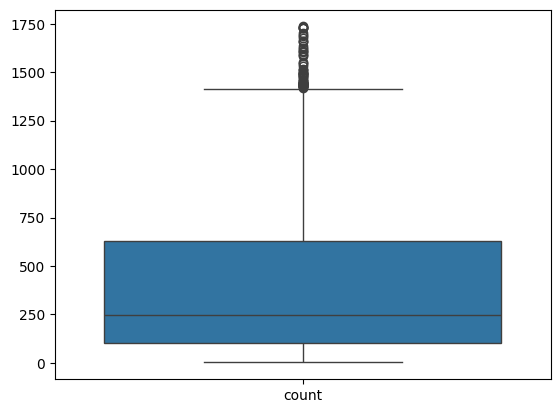

In [15]:
sns.boxplot(df_count)

As our data contains extensive data of varied cryptocurrencies all across the world, the prices are also quite varied with high ranges. Hence the above outliers are technically not outliers.

In [16]:
df1[df1['Date'].dt.year == 2013]['Currency'].value_counts()

Currency
litecoin               247
bitcoin                246
namecoin               245
novacoin               239
feathercoin            239
freicoin               238
peercoin               237
terracoin              235
mincoin                235
bitbar                 229
ixcoin                 213
worldcoin              201
franko                 198
digitalcoin            196
yacoin                 195
goldcoin               183
primecoin              172
megacoin               165
phoenixcoin            160
fastcoin               157
anoncoin               150
elacoin                148
ripple                 145
argentum               141
cryptogenic-bullion    137
infinitecoin           132
quark                  120
zetacoin               106
emerald                 98
bitgem                  87
casinocoin              81
globalcoin              75
spots                   74
tagcoin                 56
i0coin                  35
florincoin              34
nxt                

In [17]:
df1[df1['Date'].dt.year == 2014]['Currency'].value_counts()

Currency
namecoin       357
ripple         357
earthcoin      356
megacoin       356
bitcoin        356
              ... 
quotient        37
bitcoinfast     24
okcash          18
paycoin2        16
vtorrent         7
Name: count, Length: 246, dtype: int64

In [18]:
df1[df1['Date'].dt.year == 2015]['Currency'].value_counts()

Currency
iocoin         363
magi           363
stellar        363
storjcoin-x    363
clams          363
              ... 
fonziecoin      11
quebecoin        8
octocoin         7
draftcoin        6
adzcoin          6
Name: count, Length: 376, dtype: int64

In [19]:
df1[df1['Date'].dt.year == 2016]['Currency'].value_counts()

Currency
1337coin        366
diamond         366
expanse         366
ethereum        366
securecoin      366
               ... 
catcoin           5
grandcoin         4
flappycoin        4
rabbitcoin        3
bitpark-coin      2
Name: count, Length: 596, dtype: int64

In [20]:
df1[df1['Date'].dt.year == 2017]['Currency'].value_counts()

Currency
nubits          364
nav-coin        364
bitshares       364
dash            364
nexus           364
               ... 
neumark           3
utrust            3
jiyo              1
grandcoin         1
bigone-token      1
Name: count, Length: 1327, dtype: int64

In [21]:
df1[df1['Date'].dt.year == 2018]['Currency'].value_counts()

Currency
magnetcoin          42
minereum            42
ethereum            42
ethereum-gold       42
ethereum-classic    42
                    ..
datawallet           3
wepower              3
ethersportz          3
ucash                2
goldmint             2
Name: count, Length: 1515, dtype: int64

In [22]:
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

In [23]:
df1['Price'].describe()

count    6.573160e+05
mean     2.550208e+02
std      1.182752e+04
min      2.473450e-10
25%      5.600647e-04
50%      9.055905e-03
75%      1.389462e-01
max      2.530660e+06
Name: Price, dtype: float64

Text(0.5, 1.0, 'Boxplot of Prices by Year')

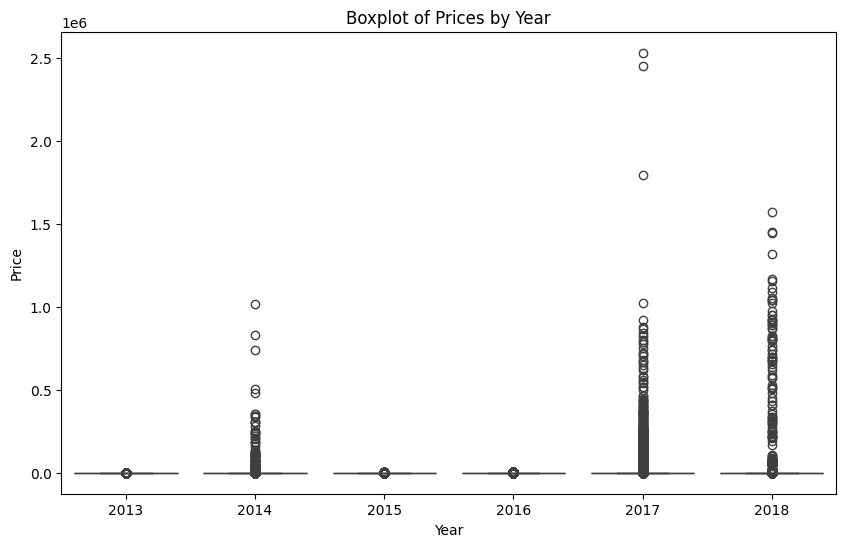

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Price', data=df1)
plt.title('Boxplot of Prices by Year')

The above plot signifies that the cryptocurrencies reached a price high in 2018 and 2017 followed by few highs in 2014 as well.

In [25]:
df1

Currency                Date     Price  Year  Month  Day
0            0x 2017-08-16 14:09:21  0.111725  2017      8   16
1            0x 2017-08-17 15:05:05  0.211486  2017      8   17
2            0x 2017-08-18 15:04:52  0.283789  2017      8   18
3            0x 2017-08-19 15:05:08  0.511434  2017      8   19
4            0x 2017-08-20 15:05:03  0.429522  2017      8   20
...         ...                 ...       ...   ...    ...  ...
657311  zurcoin 2018-02-04 07:09:10  0.003254  2018      2    4
657312  zurcoin 2018-02-05 07:09:10  0.002774  2018      2    5
657313  zurcoin 2018-02-06 07:44:10  0.001986  2018      2    6
657314  zurcoin 2018-02-09 08:29:06  0.002684  2018      2    9
657315  zurcoin 2018-02-10 03:54:06  0.002325  2018      2   10

[657316 rows x 6 columns]

#### Modeling
Modeling is performed on one sample cryptocurrency to check performance and evaluate the predictions. So that it can be later scaled to use on top cryptocurrencies.

In [26]:
df_nc = df1[df1['Currency'] == 'bitcoin']
df_nc

Currency                Date    Price  Year  Month  Day
64167  bitcoin 2013-04-28 18:47:21   135.30  2013      4   28
64168  bitcoin 2013-04-29 18:45:01   141.96  2013      4   29
64169  bitcoin 2013-04-30 18:45:02   135.30  2013      4   30
64170  bitcoin 2013-05-01 18:45:02   117.00  2013      5    1
64171  bitcoin 2013-05-02 19:20:01   103.43  2013      5    2
...        ...                 ...      ...   ...    ...  ...
65895  bitcoin 2018-02-06 04:39:28  6252.44  2018      2    6
65896  bitcoin 2018-02-07 04:44:23  7386.63  2018      2    7
65897  bitcoin 2018-02-08 04:44:23  8179.93  2018      2    8
65898  bitcoin 2018-02-09 04:44:29  8003.77  2018      2    9
65899  bitcoin 2018-02-10 03:54:27  9037.51  2018      2   10

[1733 rows x 6 columns]

In [27]:
df_nc['Date'] = df_nc['Date'].dt.date
df_nc['Date'] = pd.to_datetime(df_nc['Date'])
df_nc.set_index('Date', inplace = True)
df_nc.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
df_nc

<ipython-input-27-f455fa819e2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc['Date'] = df_nc['Date'].dt.date
<ipython-input-27-f455fa819e2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc['Date'] = pd.to_datetime(df_nc['Date'])
<ipython-input-27-f455fa819e2a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Price
Date               
2013-04-28   135.30
2013-04-29   141.96
2013-04-30   135.30
2013-05-01   117.00
2013-05-02   103.43
...             ...
2018-02-06  6252.44
2018-02-07  7386.63
2018-02-08  8179.93
2018-02-09  8003.77
2018-02-10  9037.51

[1733 rows x 1 columns]

In [28]:
df_train = df_nc[df_nc.index.year<2018]
df_train

Price
Date                
2013-04-28    135.30
2013-04-29    141.96
2013-04-30    135.30
2013-05-01    117.00
2013-05-02    103.43
...              ...
2017-12-27  16293.70
2017-12-28  14822.50
2017-12-29  15089.50
2017-12-30  13685.40
2017-12-31  13411.00

[1692 rows x 1 columns]

In [29]:
df_test = df_nc[df_nc.index.year==2018]
df_test.shape

(41, 1)

ADF Statistic: -1.97077680025116
p-value: 0.29953158007535163
Critical Value (1%): -3.4341843999399573
Critical Value (5%): -2.8632336725104834
Critical Value (10%): -2.567671665464627
ADF Statistic: -5.138109429807792
p-value: 1.1745213366300082e-05
Critical Value (1%): -3.434188901924303
Critical Value (5%): -2.8632356597809077
Critical Value (10%): -2.5676727236469037


<ipython-input-29-bb97d2d3c594>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc['Price_diff'] = df_nc['Price'].diff().dropna()


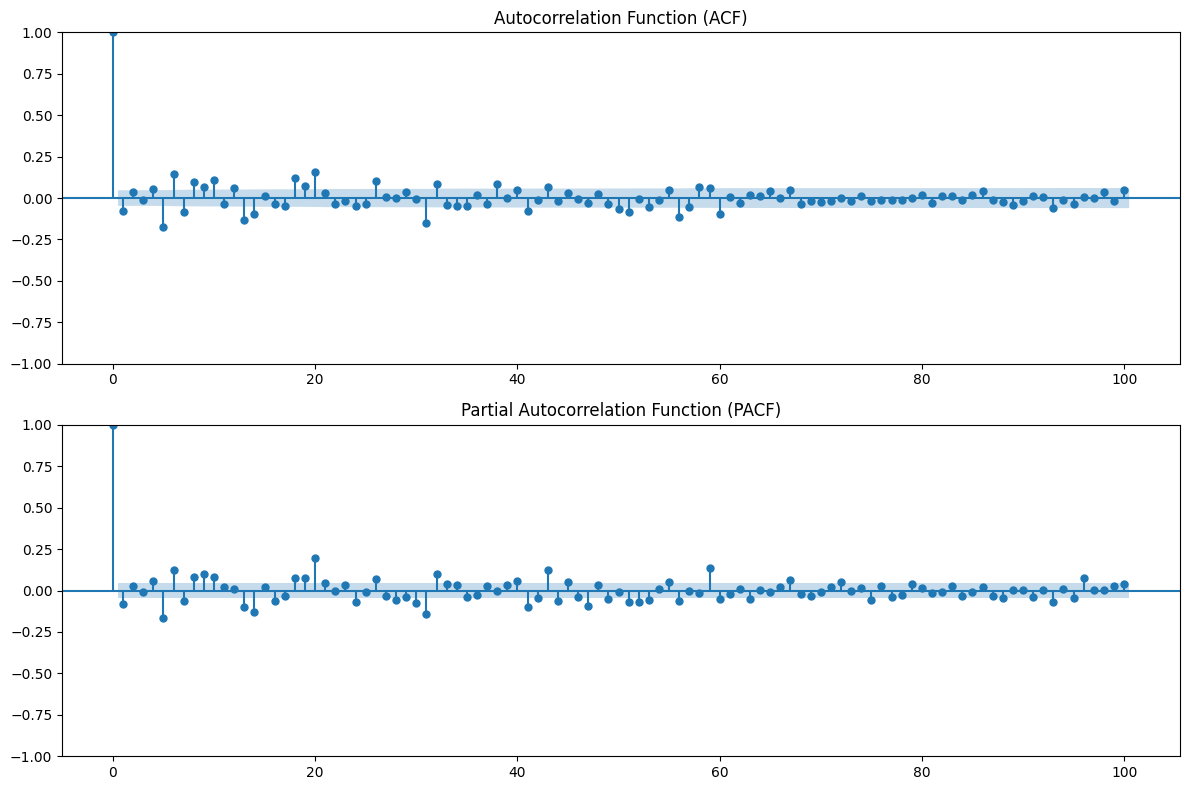

In [ ]:

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value}')

# Check if the series is stationary
check_stationarity(df_nc['Price'])

# If not stationary, take first difference
df_nc['Price_diff'] = df_nc['Price'].diff().dropna()

# Re-check stationarity
check_stationarity(df_nc['Price_diff'].dropna())

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_nc['Price_diff'].dropna(), ax=ax[0], lags=100)
ax[0].set_title('Autocorrelation Function (ACF)')

plot_pacf(df_nc['Price_diff'].dropna(), ax=ax[1], lags=100)
ax[1].set_title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

In [ ]:
# # Install the pmdarima library
# !pip install pmdarima
# import pmdarima as pm
auto_model = pm.auto_arima(df_train['Price'],
                           start_p=17, start_q=7,
                           max_p=17, max_q=17,
                           d=1,  # Differencing order determined by ADF test
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

# Print the summary of the best model
print(auto_model.summary())
#22048

Performing stepwise search to minimize aic
 ARIMA(17,1,7)(0,0,0)[0] intercept   : AIC=22011.934, Time=64.39 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22776.734, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22746.372, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22751.000, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22777.255, Time=0.04 sec
 ARIMA(16,1,7)(0,0,0)[0] intercept   : AIC=inf, Time=39.79 sec
 ARIMA(17,1,6)(0,0,0)[0] intercept   : AIC=22023.596, Time=43.08 sec
 ARIMA(17,1,8)(0,0,0)[0] intercept   : AIC=21986.937, Time=41.42 sec
 ARIMA(16,1,8)(0,0,0)[0] intercept   : AIC=22077.204, Time=43.07 sec
 ARIMA(17,1,9)(0,0,0)[0] intercept   : AIC=21980.992, Time=46.17 sec
 ARIMA(16,1,9)(0,0,0)[0] intercept   : AIC=22066.528, Time=41.98 sec
 ARIMA(17,1,10)(0,0,0)[0] intercept   : AIC=inf, Time=47.52 sec
 ARIMA(16,1,10)(0,0,0)[0] intercept   : AIC=22053.310, Time=45.77 sec
 ARIMA(17,1,9)(0,0,0)[0]             : AIC=21988.793, Time=29.84 sec

Best mod

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

ARIMA Forecast:
1692    12502.448970
1693    12396.234098
1694    10730.455800
1695    13195.783015
1696    13496.870845
1697    13658.523009
1698    12615.744138
1699    13626.963044
1700    11520.425667
1701    11823.152535
1702    10453.909531
1703    10330.964770
1704    10795.475086
1705    12627.990086
1706    11705.178879
1707    12684.277104
1708    12377.279085
1709    11643.135438
1710    10793.704761
1711    10990.622152
1712     9310.587598
1713    10375.795202
1714    11203.026987
1715    11919.827946
1716    11788.208567
1717    12844.996954
1718    11212.522153
1719    11740.882717
1720    10793.715150
1721    10052.713895
1722     9479.185764
1723    11638.069197
1724    11147.473832
1725    12311.118549
1726    12392.521831
1727    12374.792395
1728    11630.152201
1729    12024.663176
1730    10023.913181
1731    10265.526225
Name: predicted_mean, dtype: float64


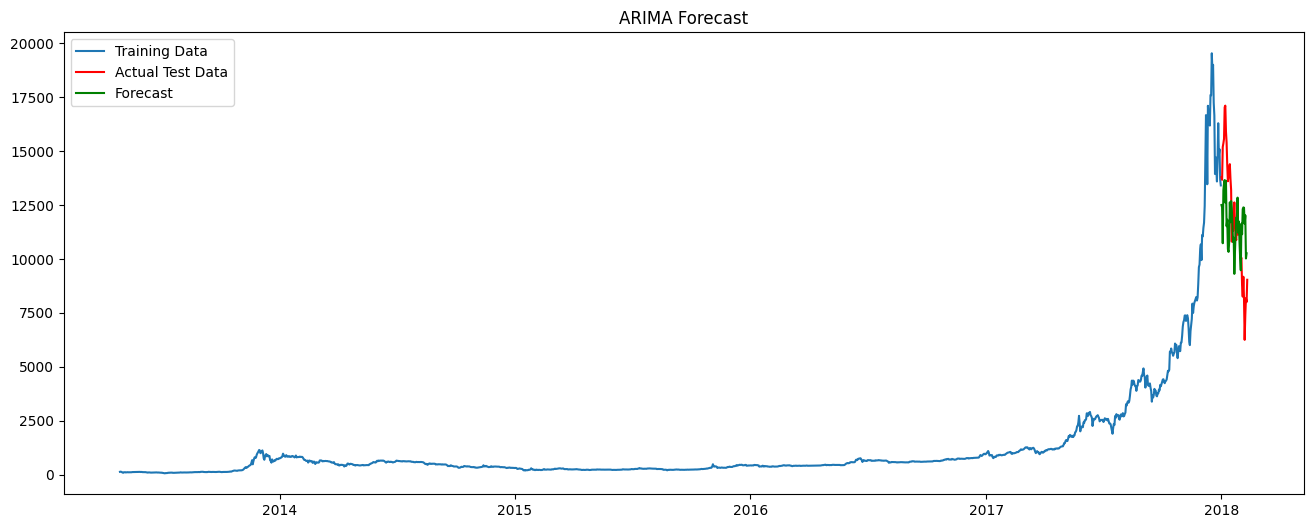

RMSE: 2570.795387144395
MAE: 2113.7562333092983
R² score: 0.09456949923959657
Percentage RMSE error: 21.5074339854788
Percentage MAE error: 17.683816019209544
R² score: 0.09456949923959657


In [ ]:

# # Install the pmdarima library
# !pip install pmdarima
# import pmdarima as pm

# Assuming df_train and df_test are already defined and contain the 'Price' column and have a DatetimeIndex
# Fit the ARIMA model
arima_model = ARIMA(df_train['Price'], order=(17, 1, 9))
arima_result = arima_model.fit()

# Forecasting the next 10 periods (assuming daily data)
arima_forecast = arima_result.forecast(steps=40)
print("ARIMA Forecast:")
print(arima_forecast)

# Plotting the results
plt.figure(figsize=(16, 6))
plt.plot(df_train.index, df_train['Price'], label='Training Data')
plt.plot(df_test.index, df_test['Price'], label='Actual Test Data', color = 'red')

# Creating a date range for the forecasted values
forecast_index = pd.date_range(start=df_train.index[-1], periods=40+1, freq='D')[1:]
plt.plot(forecast_index, arima_forecast, label='Forecast', color='green')

plt.title('ARIMA Forecast')
plt.legend()
plt.show()
actual_values = df_test.loc[forecast_index, 'Price']

# Calculate errors
forecast_errors = actual_values - arima_forecast

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
mae = mean_absolute_error(actual_values, arima_forecast)
r2 = r2_score(actual_values, arima_forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f"Percentage RMSE error: {(rmse/df_test['Price'].mean())*100}")
print(f"Percentage MAE error: {(mae/df_test['Price'].mean())*100}")
print(f"R² score: {r2}")

In [ ]:
# # Forecasting the next 10 periods (assuming daily data)
# arima_forecast = arima_result.forecast(steps=10)
# # Create a date range for the forecasted values
# forecast_index = pd.date_range(start=df_train.index[-1], periods=10+1, freq='D')[1:]

# Assuming df_test contains the actual values for the next 10 days
# Extract the corresponding actual values from the test set
actual_values = df_test.loc[forecast_index, 'Price']

# Calculate errors
forecast_errors = actual_values - arima_forecast

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
mae = mean_absolute_error(actual_values, arima_forecast)
r2 = r2_score(actual_values, arima_forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f"Percentage RMSE error: {(rmse/df_test['Price'].mean())*100}")
print(f"Percentage MAE error: {(mae/df_test['Price'].mean())*100}")
print(f"R² score: {r2}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(df_train.index, df_train['Price'], label='Training Data')
plt.plot(df_test.index, df_test['Price'], label='Actual Test Data', color = 'red')
plt.plot(forecast_index, arima_forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

[(0, 0, 0, 12), (0, 0, 1, 12), (0, 1, 0, 12), (0, 1, 1, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 1, 0, 12), (1, 1, 1, 12)]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 1692
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -11227.553
Date:                            Mon, 27 May 2024   AIC                          22463.105
Time:                                    04:09:10   BIC                          22484.809
Sample:                                         0   HQIC                         22471.145
                                           - 1692                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9652      0.004   -228.967      0.000      -0.973      -0.957
ma.L1          0.8858      0.007   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


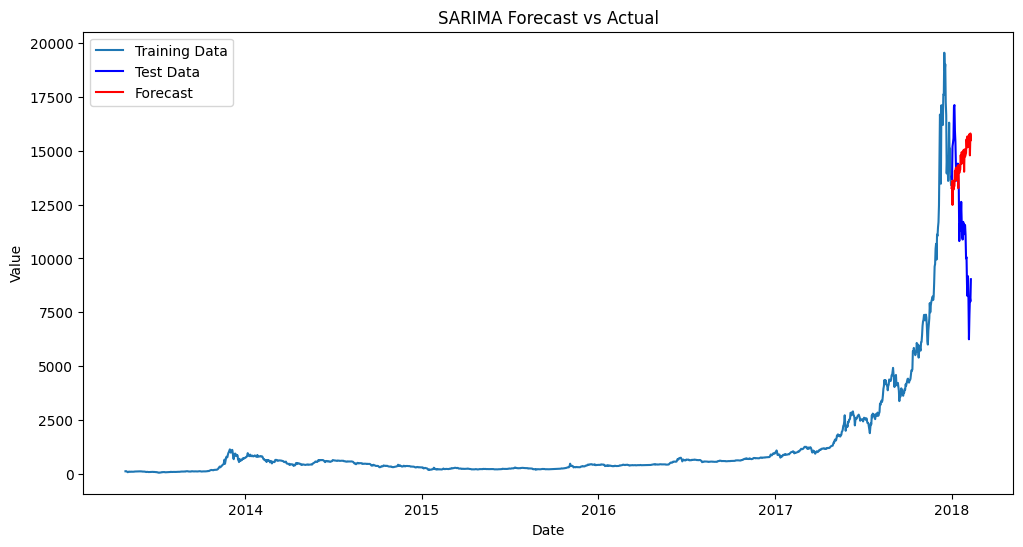

In [ ]:


# Define SARIMA parameters to search
p = d = q = range(0, 2)  # Define the range for p, d, q
pdq = list(product(p, d, q))  # Generate all different combinations of p, d, q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]  # Generate all different combinations of seasonal p, d, q
print(seasonal_pdq)
# Grid search to find optimal parameters
best_aic = np.inf
best_params = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.SARIMAX(df_train, order=param, seasonal_order=param_seasonal)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_params = (param, param_seasonal)
                best_model = results
        except:
            continue
# print(best_params)
print(best_model.summary())

# Make predictions
n_periods = len(df_test)
forecast = best_model.forecast(steps=n_periods)

# Evaluate model
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(df_test, forecast))
mae = mean_absolute_error(df_test, forecast)
r2 = r2_score(df_test, forecast)

mse = mean_squared_error(df_test, forecast)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f'Best SARIMA parameters: {best_params}')
print(f"Percentage RMSE error: {(rmse/df_test['Price'].mean())*100}")
print(f"Percentage MAE error: {(mae/df_test['Price'].mean())*100}")
print(f"R² score: {r2}")

# Visualize the predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train, label='Training Data')
plt.plot(df_test.index, df_test, label='Test Data', color='blue')
plt.plot(df_test.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast vs Actual')
plt.legend()
plt.show()

In [31]:

dataset = df_train.values

train = df_train['Price']
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=150, return_sequences=True))
model.add(LSTM(units=150, return_sequences=True))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=2)

Epoch 1/10
831/831 - 94s - loss: 0.0146 - 94s/epoch - 113ms/step
Epoch 2/10
831/831 - 49s - loss: 0.0121 - 49s/epoch - 59ms/step
Epoch 3/10
831/831 - 49s - loss: 0.0122 - 49s/epoch - 59ms/step
Epoch 4/10
831/831 - 52s - loss: 0.0119 - 52s/epoch - 63ms/step
Epoch 5/10
831/831 - 47s - loss: 0.0120 - 47s/epoch - 57ms/step
Epoch 6/10
831/831 - 47s - loss: 0.0117 - 47s/epoch - 57ms/step
Epoch 7/10
831/831 - 49s - loss: 0.0119 - 49s/epoch - 59ms/step
Epoch 8/10
831/831 - 47s - loss: 0.0120 - 47s/epoch - 57ms/step
Epoch 9/10
831/831 - 47s - loss: 0.0119 - 47s/epoch - 57ms/step
Epoch 10/10
831/831 - 47s - loss: 0.0117 - 47s/epoch - 57ms/step


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 150)           91200     
                                                                 
 lstm_1 (LSTM)               (None, 30, 150)           180600    
                                                                 
 lstm_2 (LSTM)               (None, 30, 150)           180600    
                                                                 
 dense (Dense)               (None, 30, 1)             151       
                                                                 
Total params: 452551 (1.73 MB)
Trainable params: 452551 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:

# Predict the next 41 steps
time_steps = 30
predictions = []
input_seq = scaled_data[-time_steps:]
input_seq = input_seq.reshape((1, time_steps, 1))
print(input_seq.shape)
for _ in range(41):
    next_pred = model.predict(input_seq)
    next_pred = next_pred[0, 0]
    print(next_pred.shape)
    next_pred = next_pred.reshape((1, 1, 1))
    # print(next_pred.shape)
    predictions.append(next_pred)
    input_seq = np.append(input_seq[:, 1:, :], next_pred, axis=1)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predictions.shape

(1, 30, 1)
1/1 [==============================] - 0s 60ms/step
(1,)
1/1 [==============================] - 0s 58ms/step
(1,)
1/1 [==============================] - 0s 85ms/step
(1,)
1/1 [==============================] - 0s 85ms/step
(1,)
1/1 [==============================] - 0s 63ms/step
(1,)
1/1 [==============================] - 0s 60ms/step
(1,)
1/1 [==============================] - 0s 59ms/step
(1,)
1/1 [==============================] - 0s 66ms/step
(1,)
1/1 [==============================] - 0s 74ms/step
(1,)
1/1 [==============================] - 0s 62ms/step
(1,)
1/1 [==============================] - 0s 59ms/step
(1,)
1/1 [==============================] - 0s 62ms/step
(1,)
1/1 [==============================] - 0s 66ms/step
(1,)
1/1 [==============================] - 0s 65ms/step
(1,)
1/1 [==============================] - 0s 65ms/step
(1,)
1/1 [==============================] - 0s 74ms/step
(1,)
1/1 [==============================] - 0s 82ms/step
(1,)
1/1 [===============

(41, 1)

In [56]:
df_test['Predicted_price'] = predictions
df_test

<ipython-input-56-2e2d1c297599>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_price'] = predictions


Price  Predicted_price
Date                                 
2018-01-01  13791.60      7249.006348
2018-01-02  13670.60      7208.710449
2018-01-03  15190.80      7457.241211
2018-01-04  15364.00      7606.483398
2018-01-05  15572.10      8081.230957
2018-01-06  17035.60      9255.274414
2018-01-07  17109.10     10486.304688
2018-01-08  15908.90     10197.315430
2018-01-09  15399.60      8685.792969
2018-01-10  14348.00     10713.902344
2018-01-11  13603.10     10435.802734
2018-01-12  13823.70     10558.303711
2018-01-13  14232.60     10227.755859
2018-01-14  14395.30     10970.755859
2018-01-15  13713.40     10963.866211
2018-01-16  13204.90     11918.632812
2018-01-17  10805.90     11537.434570
2018-01-18  11596.90     11664.642578
2018-01-19  11295.80     10785.539062
2018-01-20  11920.40     10473.790039
2018-01-21  12623.10      8964.140625
2018-01-22  11688.50      9414.947266
2018-01-23  11026.20      9101.624023
2018-01-24  10877.20      8761.185547
2018-01-25  11695.70      9382.240234
2018-01-26  11603.10     10285.856445
2018-01-27  11124.50      9472.628906
2018-01-28  11564.00      9623.410156
2018-01-29  11537.50      8815.487305
2018-01-30  11075.70      8653.448242
2018-01-31  10001.00      4784.786621
2018-02-01  10058.10      4758.894531
2018-02-02   8780.23      4918.640625
2018-02-03   8256.33      5014.620605
2018-02-04   9177.50      5320.046875
2018-02-05   8144.01      6073.972656
2018-02-06   6252.44      6857.282227
2018-02-07   7386.63      6674.395508
2018-02-08   8179.93      5708.744629
2018-02-09   8003.77      7000.791992
2018-02-10   9037.51      6825.374023

Test Mean Squared Error: 16655635.494428128
RMSE: 4081.1316438493045
MAE: 3414.467903963415
R² score: -1.2710918567430478
Percentage RMSE error: Price              34.143001
Predicted_price    47.415978
dtype: float64
Percentage MAE error: Price              28.565651
Predicted_price    39.670451
dtype: float64
R² score: -1.2710918567430478


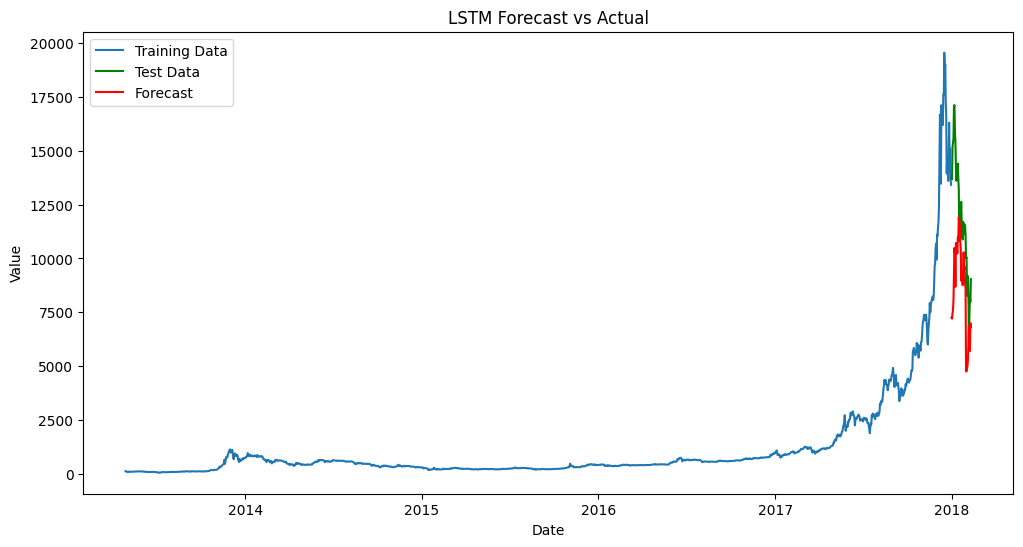

In [57]:
# rms=np.sqrt(np.mean(np.power((df_test-predictions),2)))
# print(rms)
#9.185391255263202
test_mse = mean_squared_error(df_test['Price'], predictions)
print(f'Test Mean Squared Error: {test_mse}')

# Calculate additional evaluation metrics
rmse = np.sqrt(mean_squared_error(df_test['Price'], predictions))
mae = mean_absolute_error(df_test['Price'], predictions)
r2 = r2_score(df_test['Price'], predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f"Percentage RMSE error: {(rmse/df_test.mean())*100}")
print(f"Percentage MAE error: {(mae/df_test.mean())*100}")
print(f"R² score: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Price'], label='Training Data')
plt.plot(df_test.index, df_test['Price'], label='Test Data', color='green')
plt.plot(df_test.index, df_test['Predicted_price'], label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()
# #for plotting
# # train = new_data[:987]
# # valid = new_data[987:]
# df_test['Predictions'] = closing_price
# plt.plot(df_train['Price'])
# plt.plot(df_test[['Price','Predictions']])

In [58]:
 df_test.drop(columns=['Predicted_price'], inplace = True)

<ipython-input-58-d8384e454b56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Predicted_price'], inplace = True)


In [59]:

dataset = df_train.values

train = df_train['Price']
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=75, return_sequences=True), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=75)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
52/52 [==============================] - 14s 107ms/step - loss: 0.0017
Epoch 2/50
52/52 [==============================] - 4s 80ms/step - loss: 6.7228e-04
Epoch 3/50
52/52 [==============================] - 5s 89ms/step - loss: 0.0010
Epoch 4/50
52/52 [==============================] - 6s 120ms/step - loss: 5.6814e-04
Epoch 5/50
52/52 [==============================] - 5s 100ms/step - loss: 6.1424e-04
Epoch 6/50
52/52 [==============================] - 5s 96ms/step - loss: 5.3363e-04
Epoch 7/50
52/52 [==============================] - 6s 119ms/step - loss: 5.3210e-04
Epoch 8/50
52/52 [==============================] - 4s 80ms/step - loss: 4.4608e-04
Epoch 9/50
52/52 [==============================] - 4s 80ms/step - loss: 3.3766e-04
Epoch 10/50
52/52 [==============================] - 7s 137ms/step - loss: 4.0867e-04
Epoch 11/50
52/52 [==============================] - 4s 80ms/step - loss: 4.6735e-04
Epoch 12/50
52/52 [==============================] - 4s 79ms/step - loss: 3.

In [60]:
# Predict the next 41 steps
time_steps = 30
predictions = []
input_seq = scaled_data[-time_steps:]  # Use the last 20 time steps from the training data
input_seq = input_seq.reshape((1, time_steps, 1))
print(input_seq.shape)
for _ in range(41):
    next_pred = model.predict(input_seq)
    next_pred = next_pred.reshape((1, 1, 1))
    # print(next_pred.shape)
    predictions.append(next_pred[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], next_pred, axis=1)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predictions.shape

(1, 30, 1)
1/1 [==============================] - 0s 38ms/step


(41, 1)

<ipython-input-61-1a48e9801d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_price'] = predictions


Test Mean Squared Error: 47872357.862249546
RMSE: 6918.985320279958
MAE: 6050.347432355183
R² score: -5.52767179855823
Percentage RMSE error: Price              57.884661
Predicted_price    39.643464
dtype: float64
Percentage MAE error: Price              50.617583
Predicted_price    34.666460
dtype: float64
R² score: -5.52767179855823


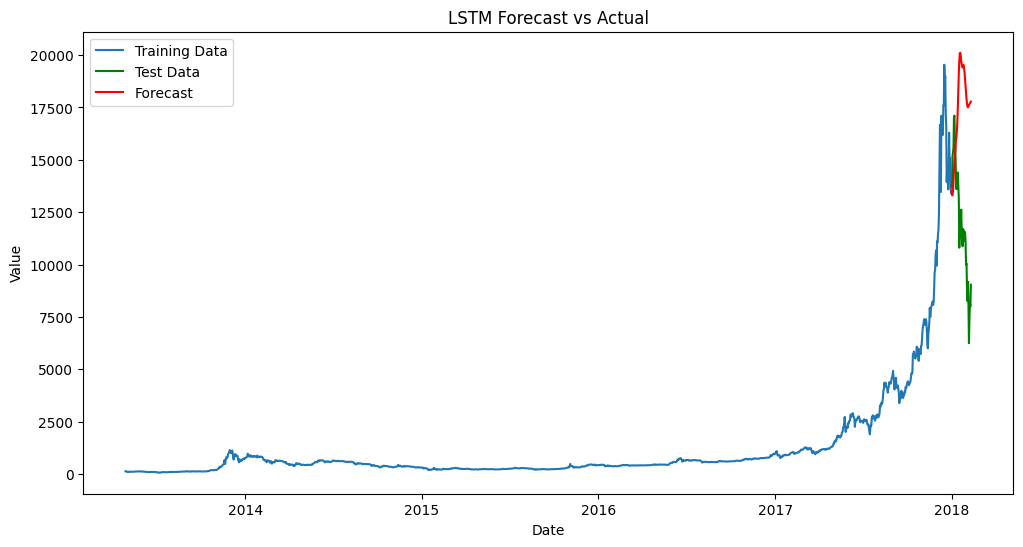

In [61]:
df_test['Predicted_price'] = predictions
# rms=np.sqrt(np.mean(np.power((df_test-predictions),2)))
# print(rms)
#9.185391255263202
test_mse = mean_squared_error(df_test['Price'], predictions)
print(f'Test Mean Squared Error: {test_mse}')

# Calculate additional evaluation metrics
rmse = np.sqrt(mean_squared_error(df_test['Price'], predictions))
mae = mean_absolute_error(df_test['Price'], predictions)
r2 = r2_score(df_test['Price'], predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f"Percentage RMSE error: {(rmse/df_test.mean())*100}")
print(f"Percentage MAE error: {(mae/df_test.mean())*100}")
print(f"R² score: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Price'], label='Training Data')
plt.plot(df_test.index, df_test['Price'], label='Test Data', color='green')
plt.plot(df_test.index, df_test['Predicted_price'], label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()
# #for plotting
# # train = new_data[:987]
# # valid = new_data[987:]
# df_test['Predictions'] = closing_price
# plt.plot(df_train['Price'])
# plt.plot(df_test[['Price','Predictions']])

In [ ]:
df_train = df_nc[df_nc.index.year<2018]
df_test = df_nc[df_nc.index.year>=2018]

In [ ]:
df_train = df_nc[df_nc.index<'2017-10-31']
df_test = df_nc[df_nc.index>='2017-10-31']
df_test

Price  Price_diff
Date                           
2017-10-31  6131.52       12.20
2017-11-01  6441.99      310.47
2017-11-02  6867.43      425.44
2017-11-03  7076.83      209.40
2017-11-04  7164.34       87.51
...             ...         ...
2018-02-06  6252.44    -1891.57
2018-02-07  7386.63     1134.19
2018-02-08  8179.93      793.30
2018-02-09  8003.77     -176.16
2018-02-10  9037.51     1033.74

[103 rows x 2 columns]

In [ ]:
df_train.drop(columns=['Price_diff'], inplace = True)
df_test.drop(columns=['Price_diff'], inplace = True)

<ipython-input-126-66e3bd531dd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['Price_diff'], inplace = True)
<ipython-input-126-66e3bd531dd5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['Price_diff'], inplace = True)


In [ ]:
# GRU model
# dataset = df_train.values
dataset = df_train.values
train = df_train['Price']
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# Build the GRU modelo
model = Sequential()
model.add(GRU(175, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(GRU(175, return_sequences=True))
model.add(GRU(175, return_sequences=True))
model.add(GRU(175))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error', 'mean_absolute_error'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
50/50 [==============================] - 18s 229ms/step - loss: 0.0251 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0251
Epoch 2/10
50/50 [==============================] - 11s 217ms/step - loss: 0.0145 - mean_squared_error: 9.0641e-04 - mean_absolute_error: 0.0145
Epoch 3/10
50/50 [==============================] - 13s 256ms/step - loss: 0.0096 - mean_squared_error: 3.2878e-04 - mean_absolute_error: 0.0096
Epoch 4/10
50/50 [==============================] - 14s 282ms/step - loss: 0.0093 - mean_squared_error: 3.1553e-04 - mean_absolute_error: 0.0093
Epoch 5/10
50/50 [==============================] - 13s 259ms/step - loss: 0.0092 - mean_squared_error: 3.3912e-04 - mean_absolute_error: 0.0092
Epoch 6/10
50/50 [==============================] - 10s 208ms/step - loss: 0.0085 - mean_squared_error: 2.6414e-04 - mean_absolute_error: 0.0085
Epoch 7/10
50/50 [==============================] - 13s 250ms/step - loss: 0.0075 - mean_squared_error: 1.9873e-04 - mean_absolute_err

In [ ]:
scaled_data

array([[0.01115275],
       [0.0122533 ],
       [0.01115275],
       ...,
       [0.94800803],
       [0.93526575],
       [1.        ]])

In [ ]:
# Predict the next 41 steps
time_steps = 30
predictions = []
input_seq = scaled_data[-time_steps:]  # Use the last 20 time steps from the training data
input_seq = input_seq.reshape((1, time_steps, 1))
print(input_seq.shape)
for _ in range(103):
    next_pred = model.predict(input_seq)
    next_pred = next_pred.reshape((1, 1, 1))
    # print(next_pred.shape)
    predictions.append(next_pred[0, 0])
    input_seq = np.append(input_seq[:, 1:, :], next_pred, axis=1)

# Transform predictions back to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
predictions.shape

(1, 30, 1)
1/1 [==============================] - 0s 36ms/step


(103, 1)

Test Mean Squared Error: 57108641.63661273
RMSE: 7557.025978294155
MAE: 6506.502146730885
R² score: -3.2971754170954855
Percentage RMSE error: Price               65.160444
Predicted_price    148.428140
dtype: float64
Percentage MAE error: Price               56.102304
Predicted_price    127.794719
dtype: float64
R² score: -3.2971754170954855


<ipython-input-130-1c044f9ea655>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Predicted_price'] = predictions


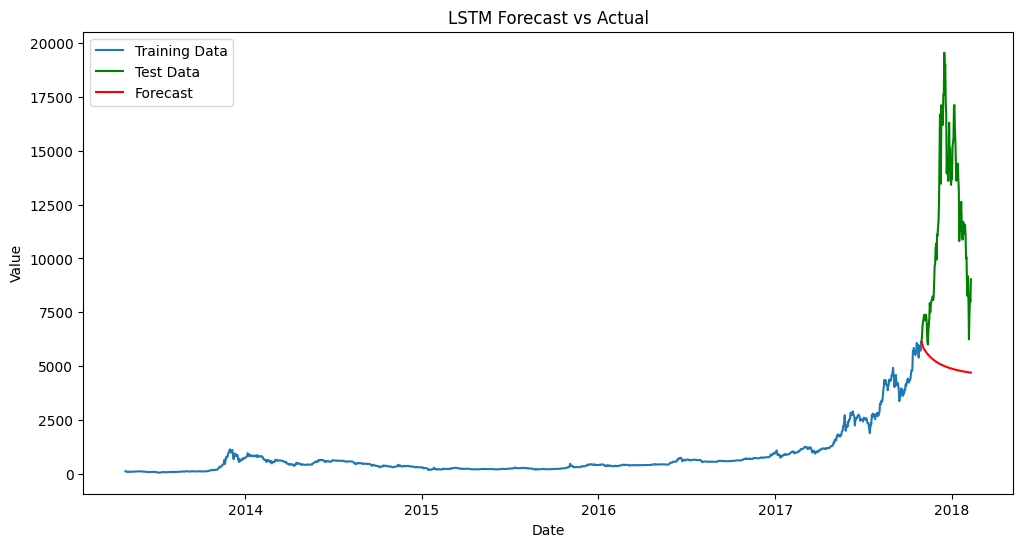

In [ ]:
# rms=np.sqrt(np.mean(np.power((df_test-predictions),2)))
# print(rms)
#9.185391255263202
df_test['Predicted_price'] = predictions
test_mse = mean_squared_error(df_test['Price'], predictions)
print(f'Test Mean Squared Error: {test_mse}')

# Calculate additional evaluation metrics
rmse = np.sqrt(mean_squared_error(df_test['Price'], predictions))
mae = mean_absolute_error(df_test['Price'], predictions)
r2 = r2_score(df_test['Price'], predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R² score: {r2}")

print(f"Percentage RMSE error: {(rmse/df_test.mean())*100}")
print(f"Percentage MAE error: {(mae/df_test.mean())*100}")
print(f"R² score: {r2}")

plt.figure(figsize=(12, 6))
plt.plot(df_train.index, df_train['Price'], label='Training Data')
plt.plot(df_test.index, df_test['Price'], label='Test Data', color='green')
plt.plot(df_test.index, df_test['Predicted_price'], label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('LSTM Forecast vs Actual')
plt.legend()
plt.show()
# #for plotting
# # train = new_data[:987]
# # valid = new_data[987:]
# df_test['Predictions'] = closing_price
# plt.plot(df_train['Price'])
# plt.plot(df_test[['Price','Predictions']])

In [ ]:
df_test

Price  Predicted_price
Date                                 
2018-01-01  13791.60     14407.240234
2018-01-02  13670.60     15115.023438
2018-01-03  15190.80     15773.502930
2018-01-04  15364.00     16404.361328
2018-01-05  15572.10     17004.916016
2018-01-06  17035.60     17585.712891
2018-01-07  17109.10     18152.046875
2018-01-08  15908.90     18704.597656
2018-01-09  15399.60     19240.927734
2018-01-10  14348.00     19757.207031
2018-01-11  13603.10     20249.392578
2018-01-12  13823.70     20713.935547
2018-01-13  14232.60     21148.076172
2018-01-14  14395.30     21549.980469
2018-01-15  13713.40     21918.677734
2018-01-16  13204.90     22254.050781
2018-01-17  10805.90     22556.673828
2018-01-18  11596.90     22827.759766
2018-01-19  11295.80     23068.957031
2018-01-20  11920.40     23282.242188
2018-01-21  12623.10     23469.816406
2018-01-22  11688.50     23633.986328
2018-01-23  11026.20     23777.052734
2018-01-24  10877.20     23901.261719
2018-01-25  11695.70     24008.738281
2018-01-26  11603.10     24101.482422
2018-01-27  11124.50     24181.312500
2018-01-28  11564.00     24249.880859
2018-01-29  11537.50     24308.667969
2018-01-30  11075.70     24358.974609
2018-01-31  10001.00     24401.982422
2018-02-01  10058.10     24438.710938
2018-02-02   8780.23     24470.039062
2018-02-03   8256.33     24496.738281
2018-02-04   9177.50     24519.476562
2018-02-05   8144.01     24538.822266
2018-02-06   6252.44     24555.291016
2018-02-07   7386.63     24569.296875
2018-02-08   8179.93     24581.195312
2018-02-09   8003.77     24591.306641
2018-02-10   9037.51     24599.896484

In [ ]:
# df_train.drop(columns = ['Price_diff'],inplace = True)
# df_test.drop(columns = ['Predicted_price'],inplace = True)
# Ensure df_train and df_test are in the correct format
df_train = df_train.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
df_test = df_test.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})

In [ ]:
df_test

ds         y
0  2018-01-01  13791.60
1  2018-01-02  13670.60
2  2018-01-03  15190.80
3  2018-01-04  15364.00
4  2018-01-05  15572.10
5  2018-01-06  17035.60
6  2018-01-07  17109.10
7  2018-01-08  15908.90
8  2018-01-09  15399.60
9  2018-01-10  14348.00
10 2018-01-11  13603.10
11 2018-01-12  13823.70
12 2018-01-13  14232.60
13 2018-01-14  14395.30
14 2018-01-15  13713.40
15 2018-01-16  13204.90
16 2018-01-17  10805.90
17 2018-01-18  11596.90
18 2018-01-19  11295.80
19 2018-01-20  11920.40
20 2018-01-21  12623.10
21 2018-01-22  11688.50
22 2018-01-23  11026.20
23 2018-01-24  10877.20
24 2018-01-25  11695.70
25 2018-01-26  11603.10
26 2018-01-27  11124.50
27 2018-01-28  11564.00
28 2018-01-29  11537.50
29 2018-01-30  11075.70
30 2018-01-31  10001.00
31 2018-02-01  10058.10
32 2018-02-02   8780.23
33 2018-02-03   8256.33
34 2018-02-04   9177.50
35 2018-02-05   8144.01
36 2018-02-06   6252.44
37 2018-02-07   7386.63
38 2018-02-08   8179.93
39 2018-02-09   8003.77
40 2018-02-10   9037.51

In [ ]:
# Prophet Model


# Define your parameter grid
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.1, 1.0, 10.0],
    'changepoint_prior_scale': [0.0001, 0.001, 0.01, 0.1, 0.5],
}

# Create a list to store the results
results = []

for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(df_train)
    future = model.make_future_dataframe(periods=120)
    forecast = model.predict(future)
    # Evaluate the model (e.g., using mean absolute error on the training set)
    y_true = df_train['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Store the results
    results.append((params, rmse))

best_params, best_rmse = min(results, key=lambda x: x[1])

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

# print(f'Best parameters: {best_params}')
# print(f'Best MAE: {best_mae}')
# print(f'Best RMSE: {best_rmse}')
# print(f'Best R²: {best_r2}')
# print(f'Best Combined Score: {best_combined_score}')

# Fit the final model with the best parameters
best_model = Prophet(**best_params)
best_model.fit(df_train)
future = best_model.make_future_dataframe(periods=120)
forecast = best_model.predict(future)
forecast_train = forecast.iloc[:1692,:]
forecast_test = forecast.iloc[1692:,:]
# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_train['ds'], df_train['y'], 'b-', label='Original Values')
ax.plot(df_test['ds'], df_test['y'], 'green', label='Original Values')
ax.plot(forecast['ds'], forecast['yhat'], 'orange', linestyle='dotted', label='Forecast')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
ax.legend()

plt.title('Forecast vs Original')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

y_pred = forecast.iloc[1692:-79,:]['yhat']
y_true = df_test['y']
# Plot the components

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Test RMSE: {rmse}')

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59zvzu2u/aioyaw7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59zvzu2u/f8l1p1uf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73027', 'data', 'file=/tmp/tmp59zvzu2u/aioyaw7d.json', 'init=/tmp/tmp59zvzu2u/f8l1p1uf.json', 'output', 'file=/tmp/tmp59zvzu2u/prophet_model4eu7umht/prophet_model-20240527213222.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:32:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:32:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
21:32:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during 

KeyboardInterrupt: 

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59zvzu2u/vscvwsul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp59zvzu2u/cvvu2kr1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41299', 'data', 'file=/tmp/tmp59zvzu2u/vscvwsul.json', 'init=/tmp/tmp59zvzu2u/cvvu2kr1.json', 'output', 'file=/tmp/tmp59zvzu2u/prophet_model4d7zwqm5/prophet_model-20240527213331.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:33:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:33:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


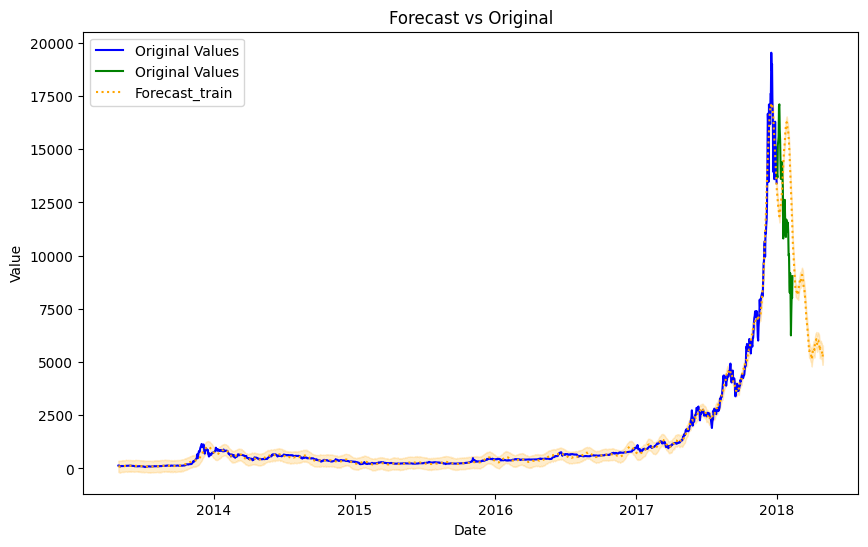

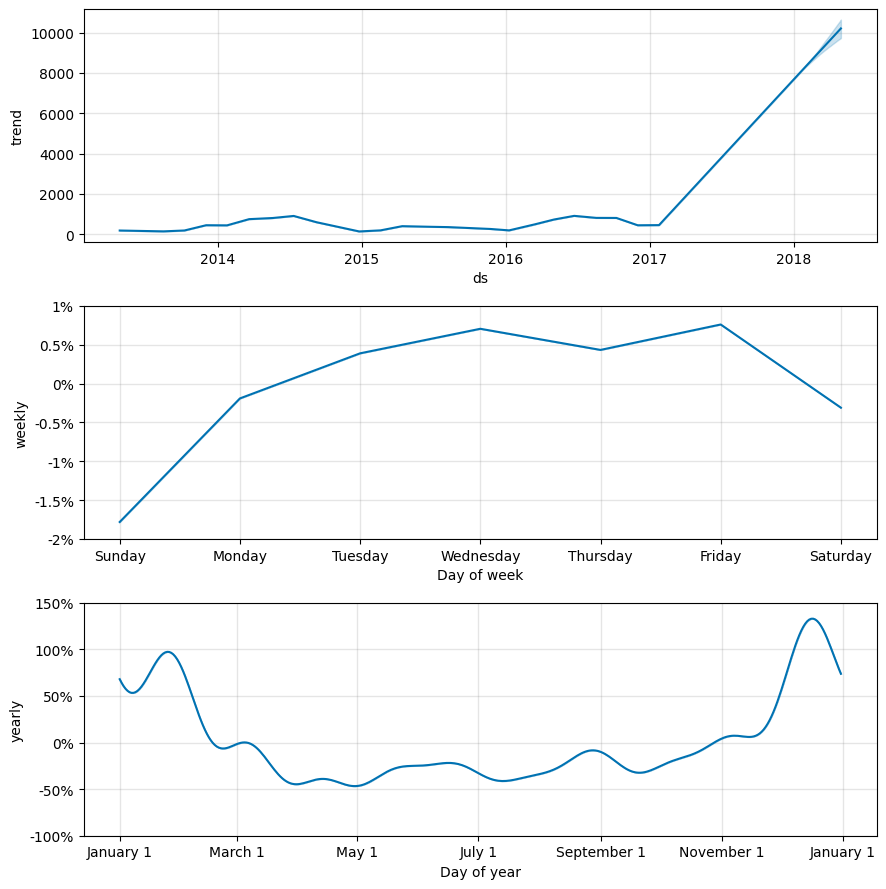

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 1879.1836636082103
Test RMSE: 4020.7512863368156


In [ ]:
model = Prophet(changepoint_prior_scale= 0.5, holidays_prior_scale= 0.1, seasonality_mode= 'multiplicative', seasonality_prior_scale= 1.0)
model.fit(df_train)
future = model.make_future_dataframe(periods=120)
forecast = model.predict(future)

forecast_train = forecast.iloc[:1692,:]
forecast_test = forecast.iloc[1692:,:]
# Plot the forecast
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df_train['ds'], df_train['y'], 'b-', label='Original Values')
ax.plot(df_test['ds'], df_test['y'], 'green', label='Original Values')
ax.plot(forecast['ds'], forecast['yhat'], 'orange', linestyle='dotted', label='Forecast_train')
# ax.plot(forecast_test['ds'], forecast_test['yhat'], 'red', label='Forecast_test')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
ax.legend()

plt.title('Forecast vs Original')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Plot the components
best_model.plot_components(forecast)
plt.show()

y_pred = forecast.iloc[1692:-79,:]['yhat']
y_true = df_test['y']
# Plot the components

rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f'Best parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')
print(f'Test RMSE: {rmse}')

In [23]:
df1

Currency                Date     Price  Year  Month  Day
0            0x 2017-08-16 14:09:21  0.111725  2017      8   16
1            0x 2017-08-17 15:05:05  0.211486  2017      8   17
2            0x 2017-08-18 15:04:52  0.283789  2017      8   18
3            0x 2017-08-19 15:05:08  0.511434  2017      8   19
4            0x 2017-08-20 15:05:03  0.429522  2017      8   20
...         ...                 ...       ...   ...    ...  ...
657311  zurcoin 2018-02-04 07:09:10  0.003254  2018      2    4
657312  zurcoin 2018-02-05 07:09:10  0.002774  2018      2    5
657313  zurcoin 2018-02-06 07:44:10  0.001986  2018      2    6
657314  zurcoin 2018-02-09 08:29:06  0.002684  2018      2    9
657315  zurcoin 2018-02-10 03:54:06  0.002325  2018      2   10

[657316 rows x 6 columns]

In [24]:
df_values = pd.DataFrame(df1[df1['Year']==2018].groupby('Currency')['Price'].max().sort_values(ascending = False))
df_values

Price
Currency                         
bit20                1.569500e+06
project-x            1.053630e+06
42-coin              1.092280e+05
russian-mining-coin  2.123300e+04
bitbtc               1.810040e+04
...                           ...
rabbitcoin           8.949480e-05
flappycoin           8.273150e-05
sprouts              3.225630e-05
dix-asset            2.313270e-05
stronghands          1.557390e-05

[1515 rows x 1 columns]

In [25]:
df_values['Scaled_price'] = np.log10(df_values['Price'])
high_list = np.array(df_values[df_values['Scaled_price']>3].index)
high_list

array(['bit20', 'project-x', '42-coin', 'russian-mining-coin', 'bitbtc',
       'bitcoin', 'cryptopiafeeshares', 'idex-membership', 'primalbase',
       'bitcoin-cash', 'terranova', 'mixin', 'jinn', 'bitgold', 'maker',
       '300-token', 'internet-of-things', 'ethereum', 'bitcoin-atom',
       'dash', 'weth', 'byteball'], dtype=object)

In [26]:
df3 = df1[df1['Currency'].isin(high_list)]
df3

Currency                Date     Price  Year  Month  Day
1738    300-token 2017-07-25 04:55:03   552.490  2017      7   25
1739    300-token 2017-07-26 04:54:53   465.414  2017      7   26
1740    300-token 2017-07-27 04:54:51   308.652  2017      7   27
1741    300-token 2017-07-28 04:54:56   319.608  2017      7   28
1742    300-token 2017-07-29 04:55:02   271.033  2017      7   29
...           ...                 ...       ...   ...    ...  ...
633903       weth 2018-02-06 19:44:28   738.769  2018      2    6
633904       weth 2018-02-07 19:44:27   814.125  2018      2    7
633905       weth 2018-02-08 19:44:27   774.714  2018      2    8
633906       weth 2018-02-09 19:44:20   888.576  2018      2    9
633907       weth 2018-02-10 03:54:20  1115.250  2018      2   10

[10594 rows x 6 columns]

In [27]:
df3['Currency'].value_counts()

Currency
bitcoin                1733
42-coin                1455
dash                   1443
bitbtc                 1048
ethereum                917
jinn                    907
bitgold                 856
byteball                409
internet-of-things      256
project-x               242
terranova               209
bitcoin-cash            203
primalbase              199
300-token               194
bit20                   180
russian-mining-coin     103
maker                    97
mixin                    33
cryptopiafeeshares       33
weth                     28
bitcoin-atom             25
idex-membership          24
Name: count, dtype: int64

<Axes: xlabel='Date', ylabel='Price'>

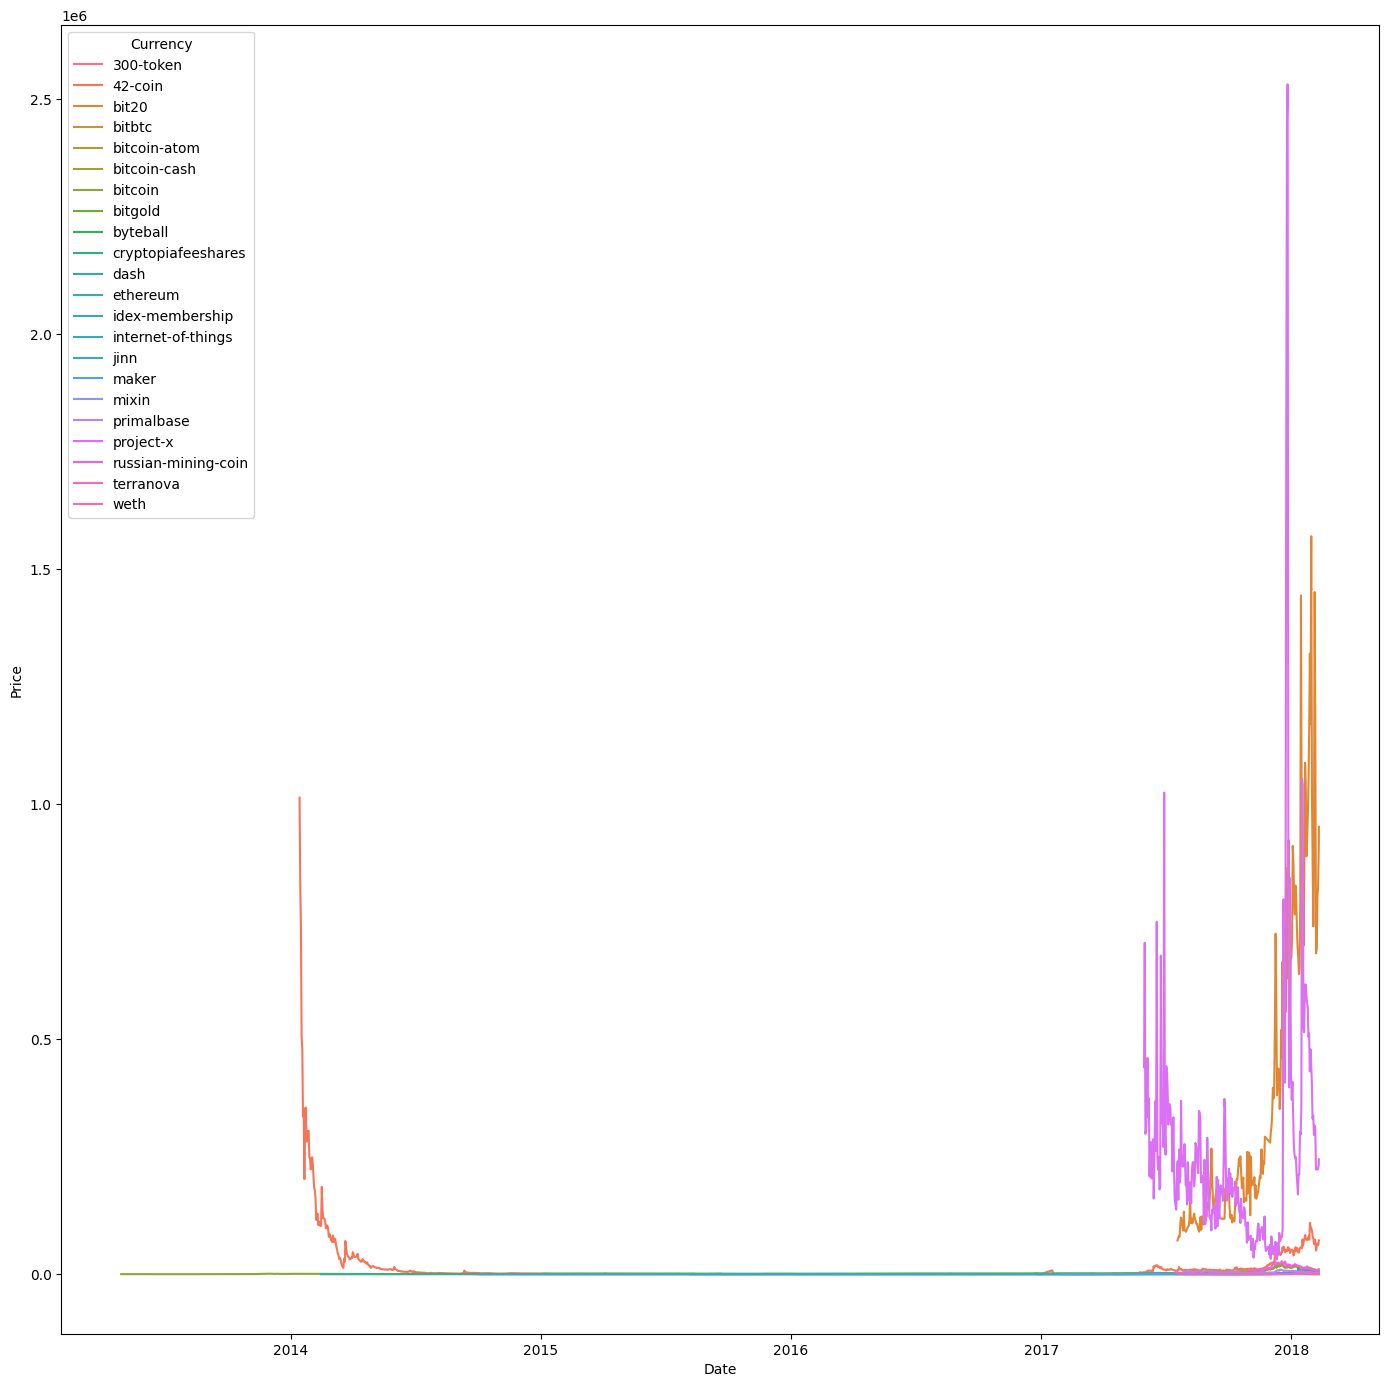

In [28]:
plt.figure(figsize=(17,17))
sns.lineplot(x=df3['Date'], y=df3['Price'], data=df3, hue='Currency')

In [29]:
df3[df3['Year']==2018]['Currency'].value_counts()

Currency
ethereum               42
bit20                  42
maker                  42
dash                   41
terranova              41
russian-mining-coin    41
primalbase             41
42-coin                41
300-token              41
byteball               41
bitcoin                41
bitcoin-cash           41
jinn                   39
project-x              38
bitbtc                 36
bitgold                35
cryptopiafeeshares     33
mixin                  33
internet-of-things     29
weth                   28
bitcoin-atom           25
idex-membership        24
Name: count, dtype: int64

In [30]:
df3

Currency                Date     Price  Year  Month  Day
1738    300-token 2017-07-25 04:55:03   552.490  2017      7   25
1739    300-token 2017-07-26 04:54:53   465.414  2017      7   26
1740    300-token 2017-07-27 04:54:51   308.652  2017      7   27
1741    300-token 2017-07-28 04:54:56   319.608  2017      7   28
1742    300-token 2017-07-29 04:55:02   271.033  2017      7   29
...           ...                 ...       ...   ...    ...  ...
633903       weth 2018-02-06 19:44:28   738.769  2018      2    6
633904       weth 2018-02-07 19:44:27   814.125  2018      2    7
633905       weth 2018-02-08 19:44:27   774.714  2018      2    8
633906       weth 2018-02-09 19:44:20   888.576  2018      2    9
633907       weth 2018-02-10 03:54:20  1115.250  2018      2   10

[10594 rows x 6 columns]

<Axes: xlabel='Date', ylabel='Price'>

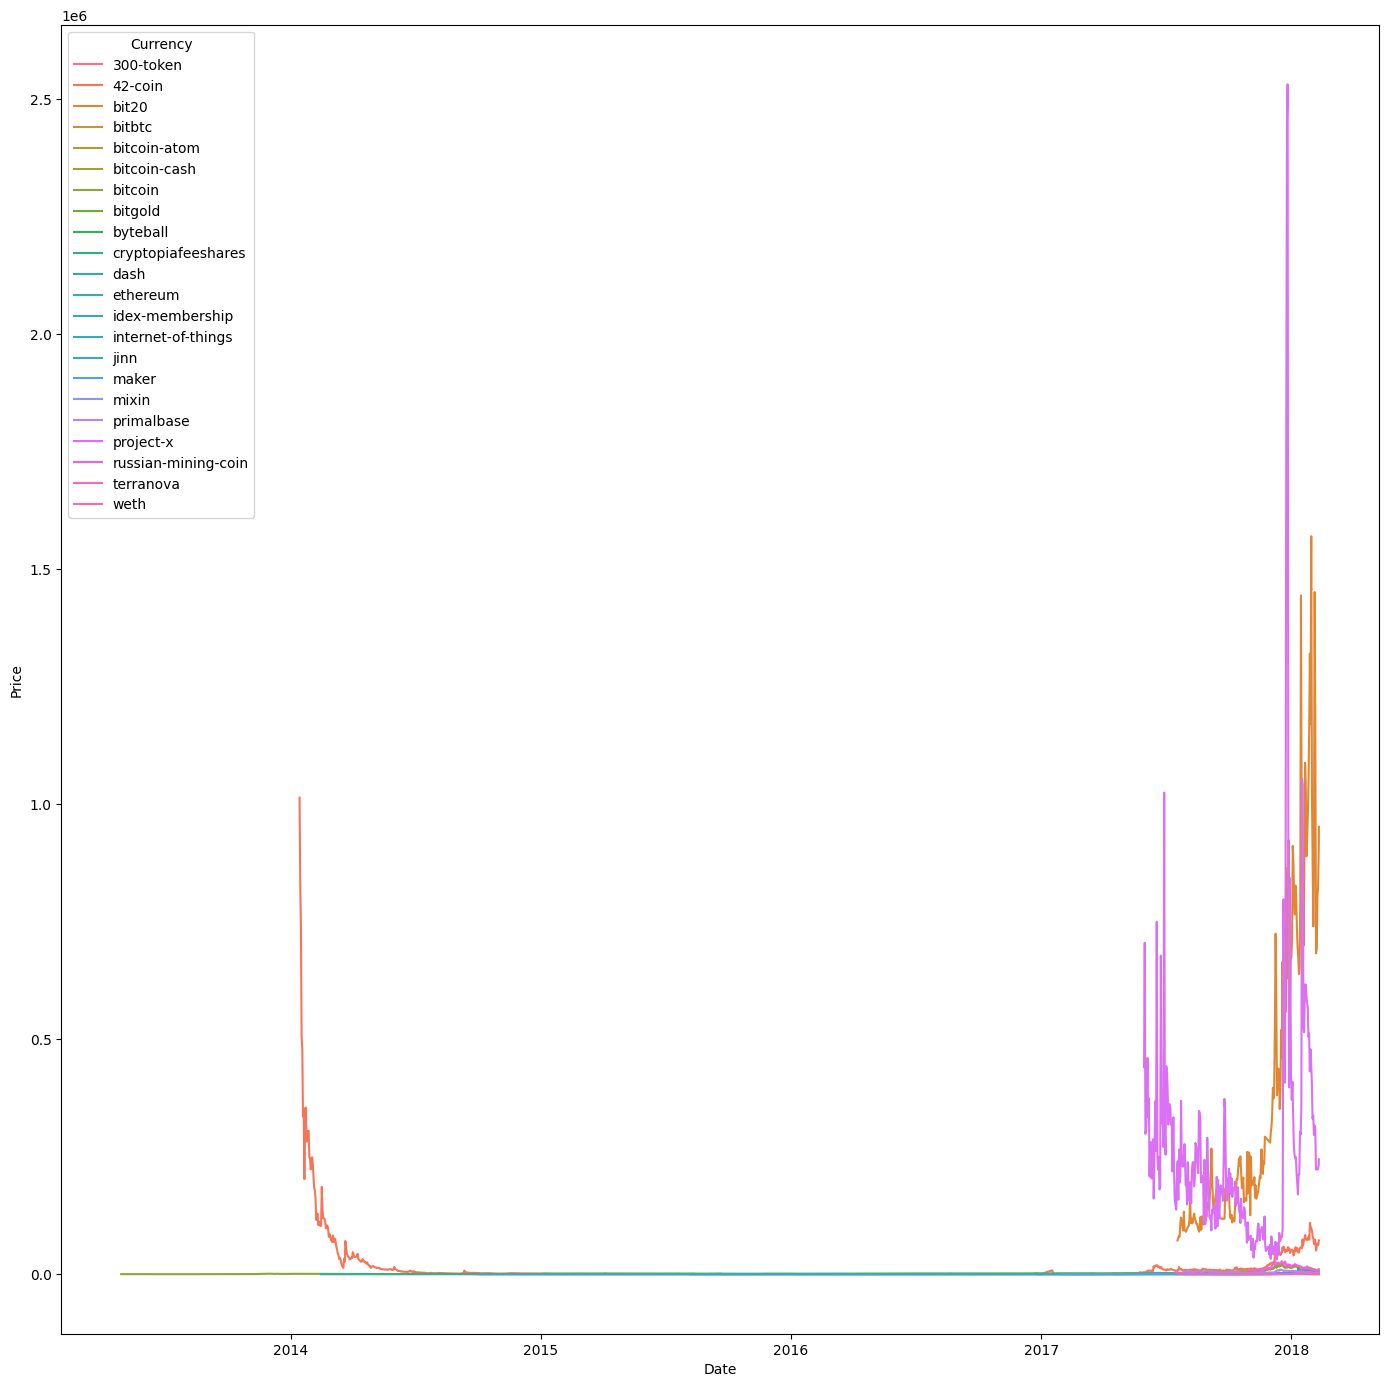

In [31]:
plt.figure(figsize=(17,17))
sns.lineplot(x=df3['Date'], y=df3['Price'], data=df3, hue='Currency')

In [32]:
df3['Date'] = pd.to_datetime(df3['Date'])

# Now, you can use the .dt accessor to extract the date
df3['Date'] = df3['Date'].dt.date

<ipython-input-32-b243abae62e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = pd.to_datetime(df3['Date'])
<ipython-input-32-b243abae62e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Date'] = df3['Date'].dt.date


In [33]:
df3.iloc[round(0.8*len(df3)):,:]

Currency        Date     Price  Year  Month  Day
220958  ethereum  2018-01-22  1069.920  2018      1   22
220959  ethereum  2018-01-23   994.121  2018      1   23
220960  ethereum  2018-01-24   967.699  2018      1   24
220961  ethereum  2018-01-25  1063.870  2018      1   25
220962  ethereum  2018-01-26  1071.880  2018      1   26
...          ...         ...       ...   ...    ...  ...
633903      weth  2018-02-06   738.769  2018      2    6
633904      weth  2018-02-07   814.125  2018      2    7
633905      weth  2018-02-08   774.714  2018      2    8
633906      weth  2018-02-09   888.576  2018      2    9
633907      weth  2018-02-10  1115.250  2018      2   10

[2119 rows x 6 columns]

In [ ]:
high_list

array(['bit20', 'project-x', '42-coin', 'russian-mining-coin', 'bitbtc',
       'bitcoin', 'cryptopiafeeshares', 'idex-membership', 'primalbase',
       'bitcoin-cash', 'terranova', 'mixin', 'jinn', 'bitgold', 'maker',
       '300-token', 'internet-of-things', 'ethereum', 'bitcoin-atom',
       'dash', 'weth', 'byteball'], dtype=object)

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/cmi2mpam.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/9dp90uvw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2687', 'data', 'file=/tmp/tmpo6c7e_5u/cmi2mpam.json', 'init=/tmp/tmpo6c7e_5u/9dp90uvw.json', 'output', 'file=/tmp/tmpo6c7e_5u/prop

Currency : bit20
Shapes : ((180, 1), (165, 2), (14, 2))


18:59:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
18:59:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/3j3u0flx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/5oxhtfxl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92306', 'data', 'file=/tmp/tmpo6c7e_5u/3j3u0flx.json', 'init=/tmp/tmpo6c7e_5u/5oxhtfxl.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelaabty03_/prophet_model-20240529185935.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:59:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:59:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 81249.67619563008


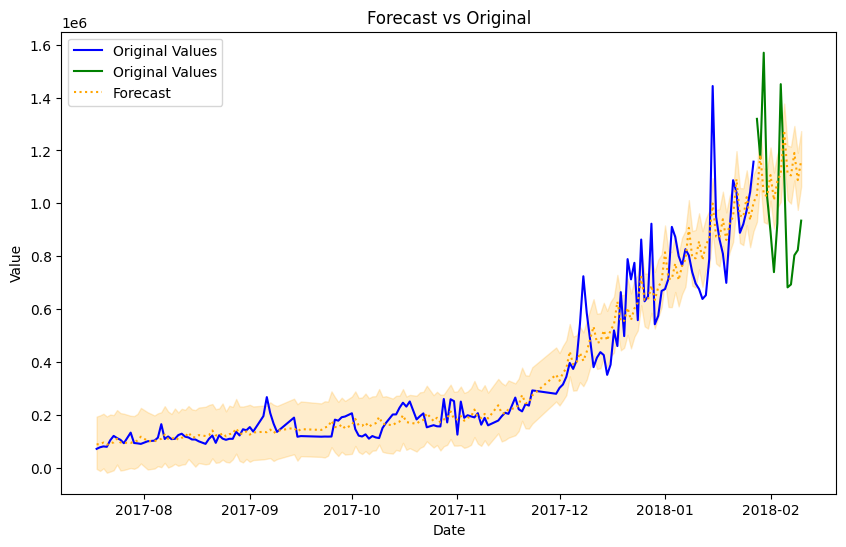

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/jvgjbmqo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/qbqqhiba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98079', 'data', 'file=/tmp/tmpo6c7e_5u/jvgjbmqo.json', 'init=/tmp/tmpo6c7e_5u/qbqqhiba.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 81249.67619563008
Test RMSE: 302865.0127367584
Percentage RMSE error: 29.993822623721517
Currency : project-x
Shapes : ((242, 1), (227, 2), (15, 2))


19:00:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/wwee1ba3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/0h489dje.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28721', 'data', 'file=/tmp/tmpo6c7e_5u/wwee1ba3.json', 'init=/tmp/tmpo6c7e_5u/0h489dje.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelao4zg17_/prophet_model-20240529190027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:00:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:00:27 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 257968.78543795916


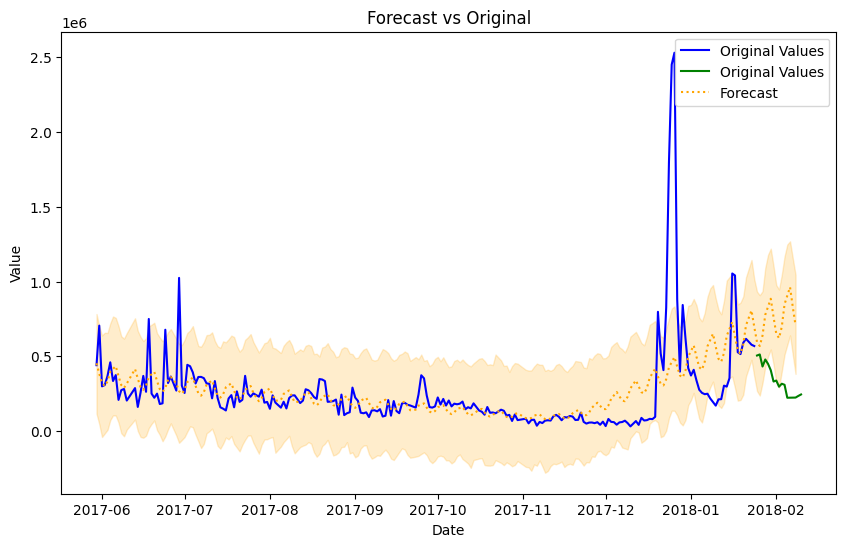

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/hzmlqu1o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/sop5anho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46295', 'data', 'file=/tmp/tmpo6c7e_5u/hzmlqu1o.json', 'init=/tmp/tmpo6c7e_5u/sop5anho.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelxfxgtrim/prophet_model-20240529190107.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=1000

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 257968.78543795916
Test RMSE: 441542.7905477158
Percentage RMSE error: 125.0385011071747
Currency : 42-coin
Shapes : ((1455, 1), (1440, 2), (15, 2))


19:01:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:01:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/hrrngdfx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/bcrdjfoc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98285', 'data', 'file=/tmp/tmpo6c7e_5u/hrrngdfx.json', 'init=/tmp/tmpo6c7e_5u/bcrdjfoc.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modeldehi6fnv/prophet_model-20240529190108.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:01:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:01:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 10119.933181252385


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/wkjfjkdn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99035', 'data', 'file=/tmp/tmpo6c7e_5u/7363k425.json', 'init=/tmp/tmpo6c7e_5u/wkjfjkdn.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelhg0r8jxr/prophet_model-20240529190808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


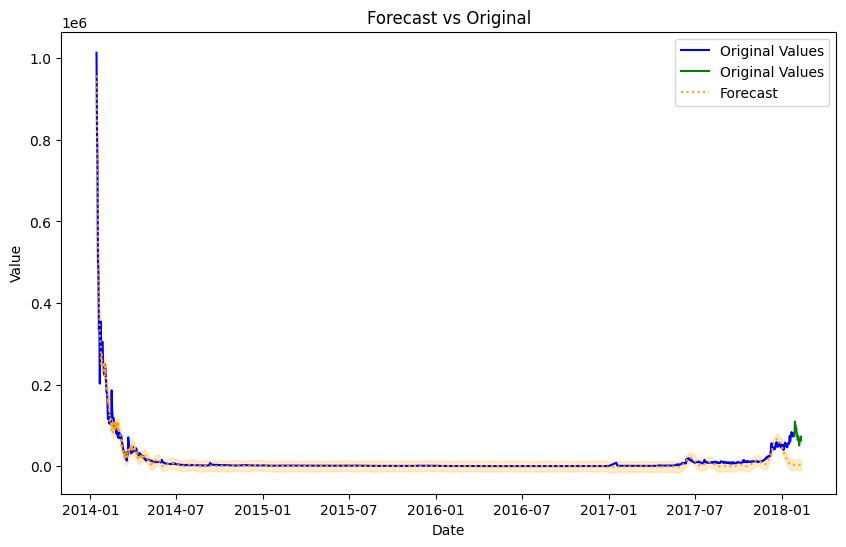

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/7f39a4h0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/y2u3ssge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76139', 'data', 'file=/tmp/tmpo6c7e_5u/7f39a4h0.json', 'init=/tmp/tmpo6c7e_5u/y2u3ssge.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 10119.933181252385
Test RMSE: 74808.97545130385
Percentage RMSE error: 98.38059127440428
Currency : russian-mining-coin
Shapes : ((103, 1), (88, 2), (15, 2))


19:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/4l6a2fw1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/tbsh3l6s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77897', 'data', 'file=/tmp/tmpo6c7e_5u/4l6a2fw1.json', 'init=/tmp/tmpo6c7e_5u/tbsh3l6s.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modele9gzcadh/prophet_model-20240529190813.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:08:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:08:14 - cmdstanpy - INFO - Chain [1]

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 1487.2437989145883


19:08:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


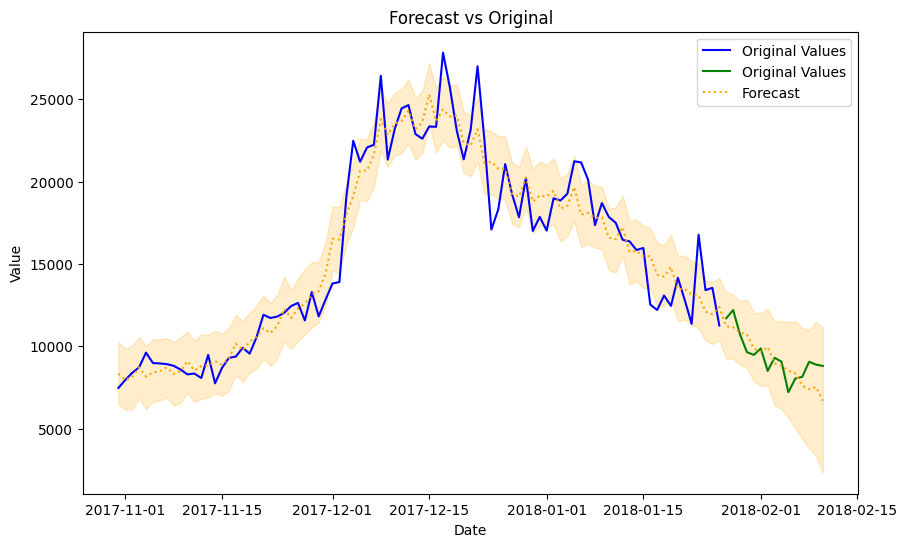

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/7g6yv73c.json


Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 1487.2437989145883
Test RMSE: 1038.3866207290662
Percentage RMSE error: 11.076529601571892
Currency : bitbtc
Shapes : ((1048, 1), (1033, 2), (15, 2))


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/ezbnh15o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70171', 'data', 'file=/tmp/tmpo6c7e_5u/7g6yv73c.json', 'init=/tmp/tmpo6c7e_5u/ezbnh15o.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model2tmt4b8_/prophet_model-20240529190900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:09:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:09:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/gblhp9b6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/2mb_7acr.json
DE

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 410.37368891168467


19:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


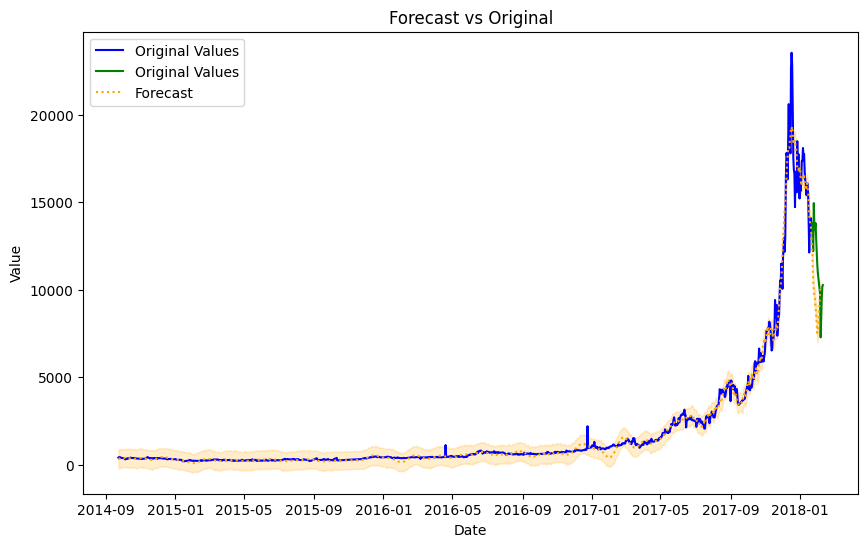

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/pwor1ao0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/7cw96648.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40291', 'data', 'file=/tmp/tmpo6c7e_5u/pwor1ao0.json', 'init=/tmp/tmpo6c7e_5u/7cw96648.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model6le0tie5/prophet_model-20240529191255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=1000

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 410.37368891168467
Test RMSE: 2714.127710965719
Percentage RMSE error: 23.57715204328644
Currency : bitcoin
Shapes : ((1733, 1), (1718, 2), (15, 2))


19:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:12:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:12:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/aoo0at15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/9cuj36yc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6702', 'data', 'file=/tmp/tmpo6c7e_5u/aoo0at15.json', 'init=/tmp/tmpo6c7e_5u/9cuj36yc.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model3iwl1pqp/prophet_model-20240529191255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 281.00561372941837


19:16:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


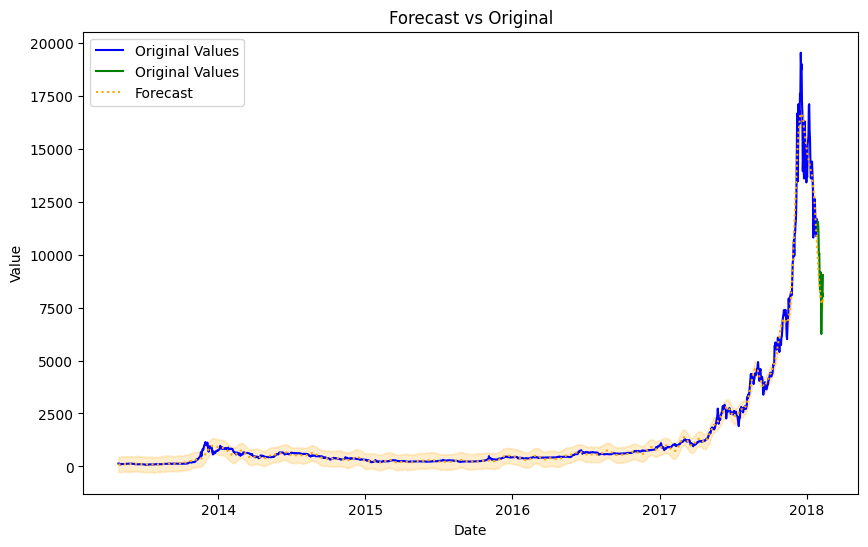

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/5_iztzii.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/_2r1eg34.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31423', 'data', 'file=/tmp/tmpo6c7e_5u/5_iztzii.json', 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 281.00561372941837
Test RMSE: 1135.688542468592
Percentage RMSE error: 12.29285079106697
Currency : cryptopiafeeshares
Shapes : ((33, 1), (18, 2), (14, 2))


19:16:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/lgda3p5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/hd4qzs3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86004', 'data', 'file=/tmp/tmpo6c7e_5u/lgda3p5b.json', 'init=/tmp/tmpo6c7e_5u/hd4qzs3e.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model27rzxf34/prophet_model-20240529191632.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:16:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 721.9073671252042


19:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


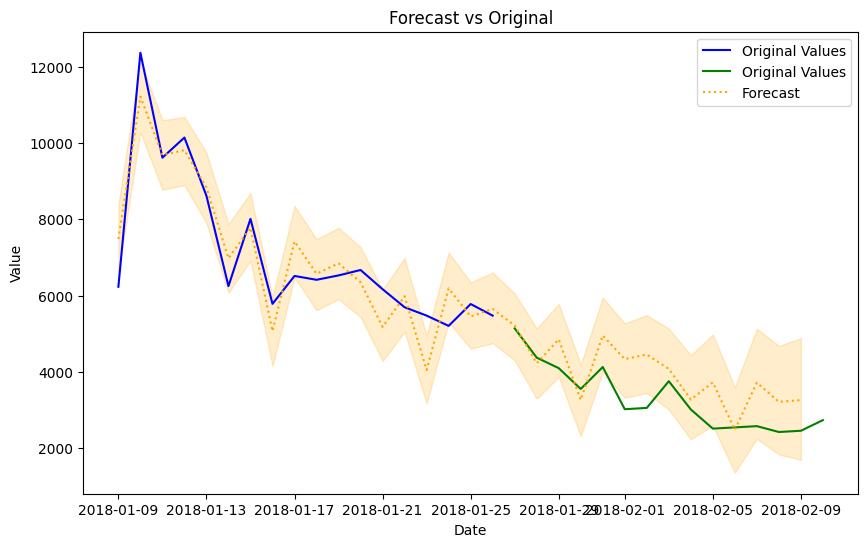

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/4sc74lj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/wjazjyok.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/s

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 721.9073671252042
Test RMSE: 811.201880732598
Percentage RMSE error: 24.24222947019528
Currency : idex-membership
Shapes : ((24, 1), (9, 2), (14, 2))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/lq9ul8ih.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/2ok_8qtu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78626', 'data', 'file=/tmp/tmpo6c7e_5u/lq9ul8ih.json', 'init=/tmp/tmpo6c7e_5u/2ok_8qtu.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelifxdl4_6/prophet_model-20240529191922.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:19:22 - cmdstanpy - INFO - Chain [1] start processing
IN

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 740.5558563681817


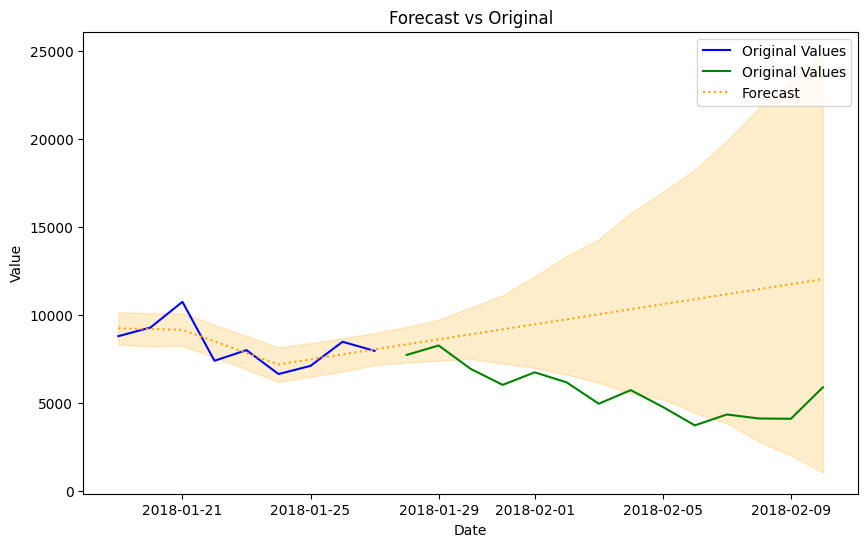

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/vhy71mk8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/d8n29hsn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21813', 'data', 'file=/tmp/tmpo6c7e_5u/vhy71mk8.json', 'init=/tmp/tmpo6c7e_5u/d8n29hsn.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 740.5558563681817
Test RMSE: 5099.961058531538
Percentage RMSE error: 89.83959272336716
Currency : primalbase
Shapes : ((199, 1), (184, 2), (15, 2))


19:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/mamwqe2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/o9sfor1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2644', 'data', 'file=/tmp/tmpo6c7e_5u/mamwqe2x.json', 'init=/tmp/tmpo6c7e_5u/o9sfor1f.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modeljj_e2qph/prophet_model-20240529191945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:19:45 - cmdstanpy - INFO - Chain [1] d

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 784.6752497857391


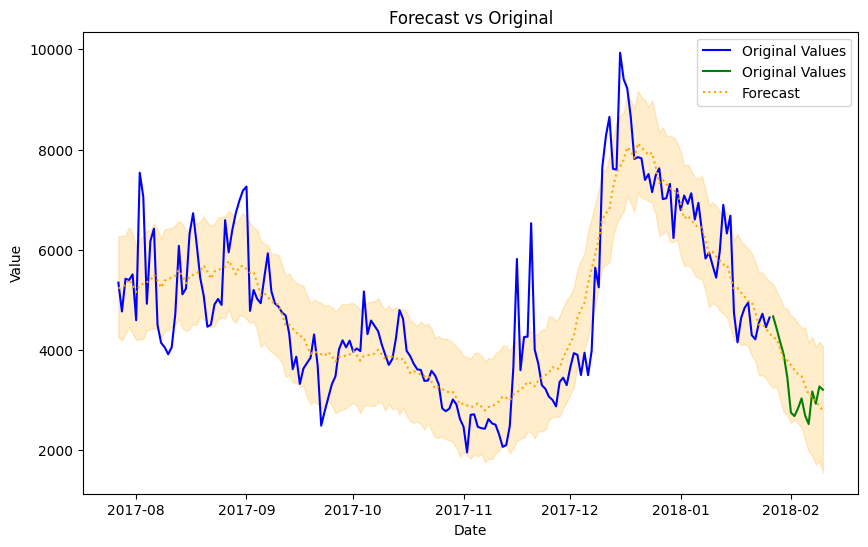

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/ynku38v5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/ubl44eww.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98977', 'data', 'file=/tmp/tmpo6c7e_5u/ynku38v5.json', 'init=/tmp/tmpo6c7e_5u/ubl44eww.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 784.6752497857391
Test RMSE: 505.10941516117396
Percentage RMSE error: 15.246297063963047
Currency : bitcoin-cash
Shapes : ((203, 1), (188, 2), (15, 2))


19:20:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/6159zjjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/3y3sv3qr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42313', 'data', 'file=/tmp/tmpo6c7e_5u/6159zjjf.json', 'init=/tmp/tmpo6c7e_5u/3y3sv3qr.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model87d1_iqe/prophet_model-20240529192051.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:20:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:20:52 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 191.44165832827463


19:23:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


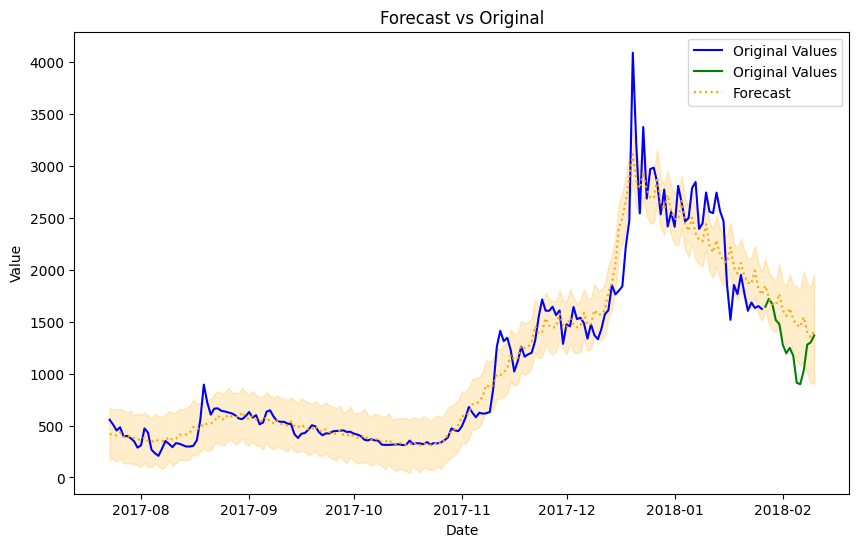

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/mf8h_3ee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/2bvuvq04.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70826', 'data', 'file=/tmp/tmpo6c7e_5u/mf8h_3ee.json', 'init=/tmp/tmpo6c7e_5u/2bvuvq04.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 191.44165832827463
Test RMSE: 321.65603998404714
Percentage RMSE error: 24.46977122549275
Currency : terranova
Shapes : ((209, 1), (194, 2), (15, 2))


19:23:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/jt_x94s5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/dc2wyvz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52375', 'data', 'file=/tmp/tmpo6c7e_5u/jt_x94s5.json', 'init=/tmp/tmpo6c7e_5u/dc2wyvz1.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model1sx8rlta/prophet_model-20240529192304.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:23:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:23:04 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 316.47462454212604


19:23:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


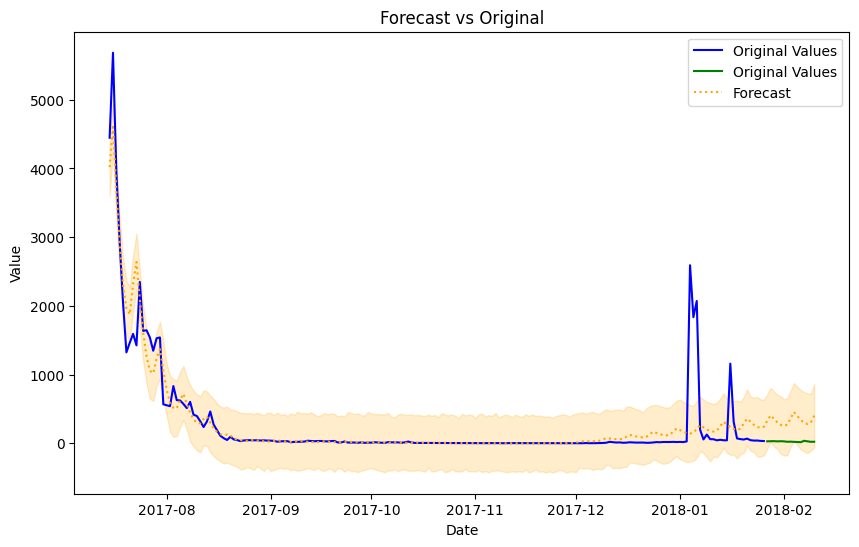

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/tes9_clj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/1gid19xu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40089', 'data', 'file=/tmp/tmpo6c7e_5u/tes9_clj.json', 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 316.47462454212604
Test RMSE: 315.3257930973746
Percentage RMSE error: 1194.8944442043253
Currency : mixin
Shapes : ((33, 1), (18, 2), (15, 2))


19:23:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 13.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/cxk242md.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/tn2_i_t4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52775', 'data', 'file=/tmp/tmpo6c7e_5u/cxk242md.json', 'init=/tmp/tmpo6c7e_5u/tn2_i_t4.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelxhkyf000/prophet_model-20240529192354.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:23:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 75.77193378564448


19:25:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


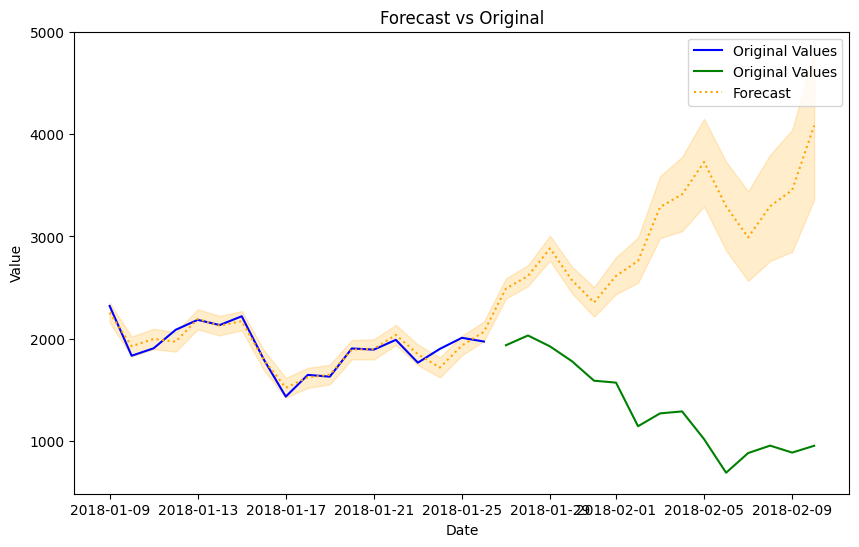

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/v7ct3me1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/zam5gdm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9921', 'data', 'file=/tmp/tmpo6c7e_5u/v7ct3me1.json', 'init=/tmp/tmpo6c7e_5u/zam5gdm3.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modela9emwqas/prophet_model-20240529192517.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 75.77193378564448
Test RMSE: 1923.645276673021
Percentage RMSE error: 144.8773459425071
Currency : jinn
Shapes : ((907, 1), (892, 2), (15, 2))


19:25:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:25:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/xkd7j2ui.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/4obj9_9g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73941', 'data', 'file=/tmp/tmpo6c7e_5u/xkd7j2ui.json', 'init=/tmp/tmpo6c7e_5u/4obj9_9g.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelke94_4yp/prophet_model-20240529192517.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:25:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:25:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 74.3907178736122


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3204', 'data', 'file=/tmp/tmpo6c7e_5u/svbgvulx.json', 'init=/tmp/tmpo6c7e_5u/z5xjvhdn.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelh2umvrdj/prophet_model-20240529192853.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:28:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:28:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


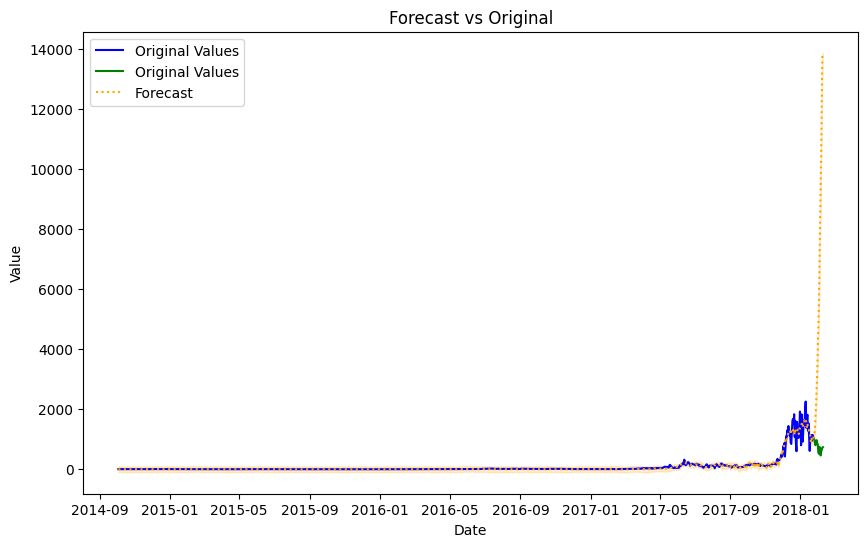

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/gfc6wem_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/31s5z_ju.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9580', 'data', 'file=/tmp/tmpo6c7e_5u/gfc6wem_.json', 'init=/tmp/tmpo6c7e_5u/31s5z_ju.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model4x_te9yw/prophet_model-20240529192856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 74.3907178736122
Test RMSE: 6510.212653360103
Percentage RMSE error: 885.2230040994644
Currency : bitgold
Shapes : ((856, 1), (841, 2), (15, 2))


19:28:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:28:56 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/02crp9h2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/k_xcoo1y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58124', 'data', 'file=/tmp/tmpo6c7e_5u/02crp9h2.json', 'init=/tmp/tmpo6c7e_5u/k_xcoo1y.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelqpe7qzfk/prophet_model-20240529192856.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:28:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:28:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 95.60506261399503


19:30:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


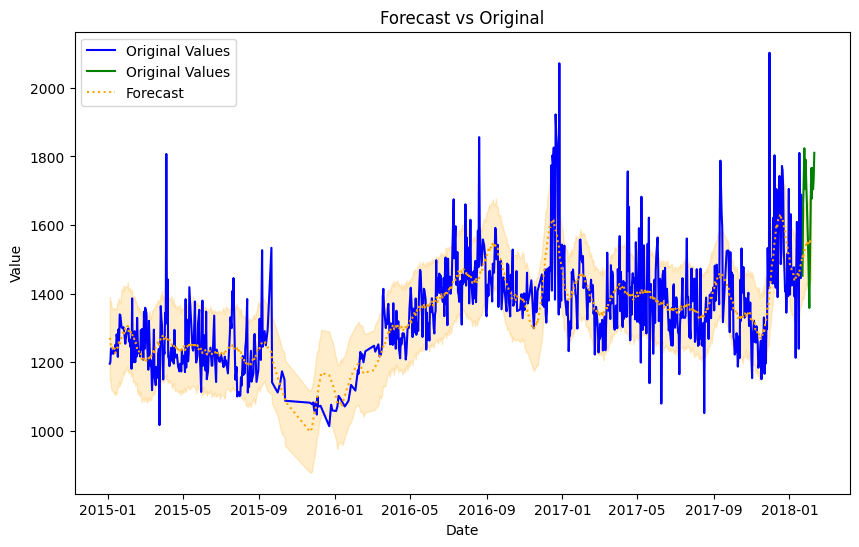

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/ngrqknqj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/mt3pcs9t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94197', 'data', 'file=/tmp/tmpo6c7e_5u/ngrqknqj.json', 'init=/tmp/tmpo6c7e_5u/mt3pcs9t.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 95.60506261399503
Test RMSE: 187.60542160515772
Percentage RMSE error: 11.272995802502203
Currency : maker
Shapes : ((97, 1), (82, 2), (14, 2))


19:30:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/itoy3vjr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/n8oz1qpx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64452', 'data', 'file=/tmp/tmpo6c7e_5u/itoy3vjr.json', 'init=/tmp/tmpo6c7e_5u/n8oz1qpx.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelqbi3iw3x/prophet_model-20240529193036.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:30:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:30:37 - cmdstanpy - INFO - Chain [1]

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}
Best RMSE: 156.25856119297913


19:31:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


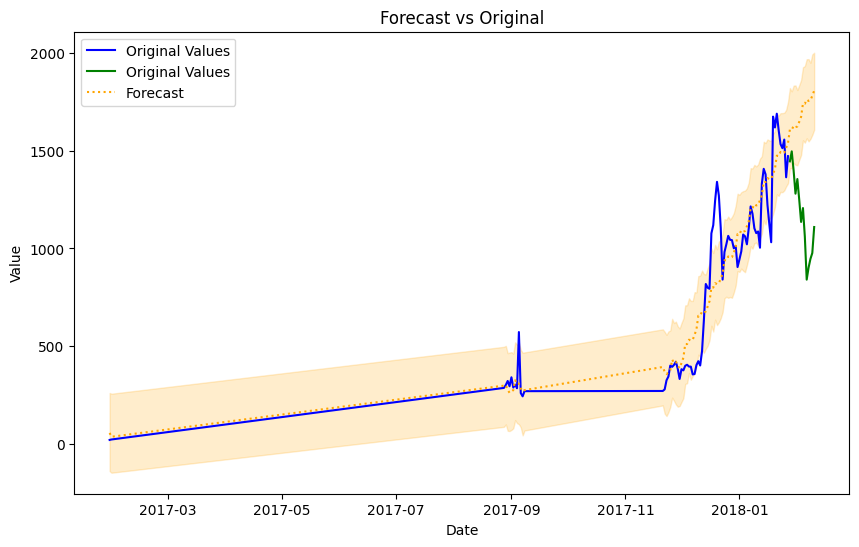

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/5hgunz9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/gcnivkqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3770', 'data', 'file=/tmp/tmpo6c7e_5u/5hgunz9s.json', 'init=/tmp/tmpo6c7e_5u/gcnivkqe.json', 'output', 'file=/tmp/tmpo6c7e_5u/prop

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 1.0}
Best RMSE: 156.25856119297913
Test RMSE: 587.0175273659894
Percentage RMSE error: 50.11855925533931
Currency : 300-token
Shapes : ((194, 1), (179, 2), (15, 2))


19:31:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/kg9go2np.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/5gocb9yz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76983', 'data', 'file=/tmp/tmpo6c7e_5u/kg9go2np.json', 'init=/tmp/tmpo6c7e_5u/5gocb9yz.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model16ztzd4a/prophet_model-20240529193138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:31:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:31:38 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 89.73167105343882


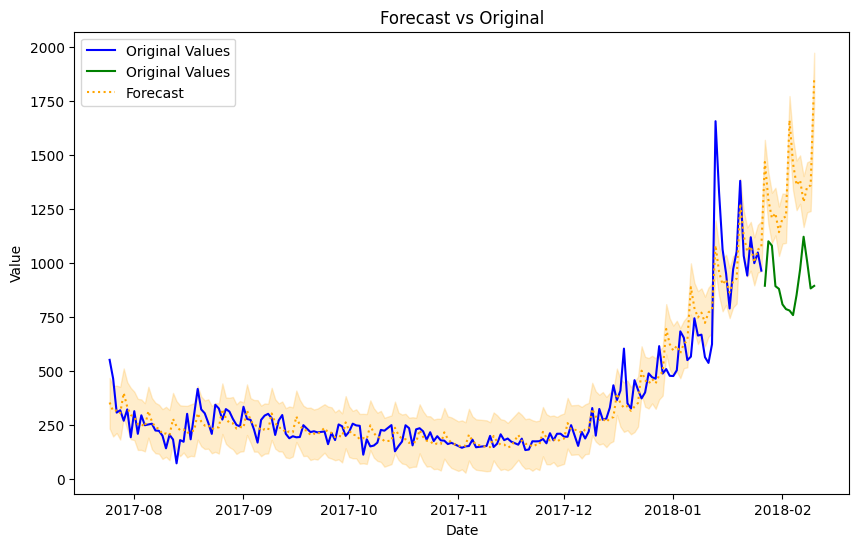

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/jkeu93vj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/haltaph6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67991', 'data', 'file=/tmp/tmpo6c7e_5u/jkeu93vj.json', 'init=/tmp/tmpo6c7e_5u/haltaph6.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 89.73167105343882
Test RMSE: 509.10792202951745
Percentage RMSE error: 55.69149898662784
Currency : internet-of-things
Shapes : ((256, 1), (241, 2), (15, 2))


19:32:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/zbshj222.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/fkobma1q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92754', 'data', 'file=/tmp/tmpo6c7e_5u/zbshj222.json', 'init=/tmp/tmpo6c7e_5u/fkobma1q.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model7_pj126l/prophet_model-20240529193219.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:32:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:32:19 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 184.7840473802506


19:33:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


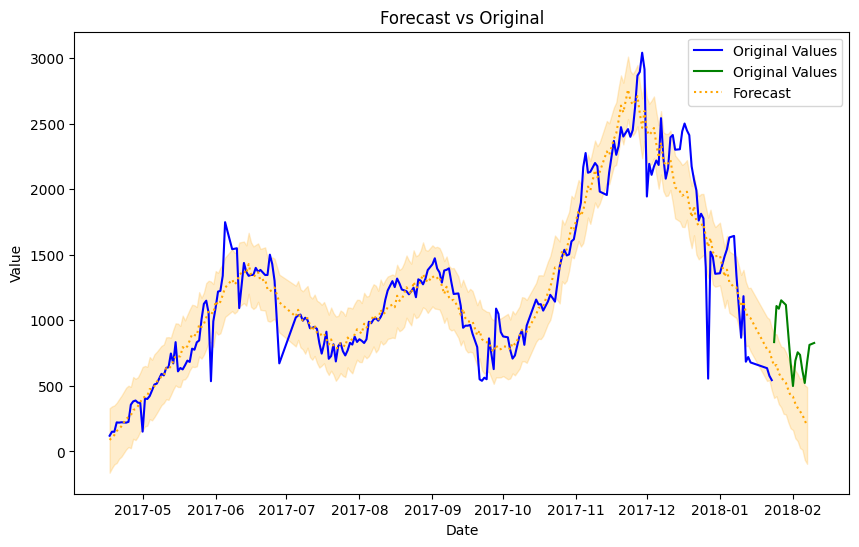

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/agssqt5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/od6w10tw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70604', 'data', 'file=/tmp/tmpo6c7e_5u/agssqt5u.json', 'init=/tmp/tmpo6c7e_5u/od6w10tw.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelw2y186d4/prophet_model-20240529193327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=1000

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 184.7840473802506
Test RMSE: 409.9952915737636
Percentage RMSE error: 50.73391680157881
Currency : ethereum
Shapes : ((917, 1), (902, 2), (14, 2))


19:33:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:33:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/upx61592.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/hk_bs_82.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95820', 'data', 'file=/tmp/tmpo6c7e_5u/upx61592.json', 'init=/tmp/tmpo6c7e_5u/hk_bs_82.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelzqvq241s/prophet_model-20240529193327.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:33:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:33:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 23.23593076728529


19:37:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


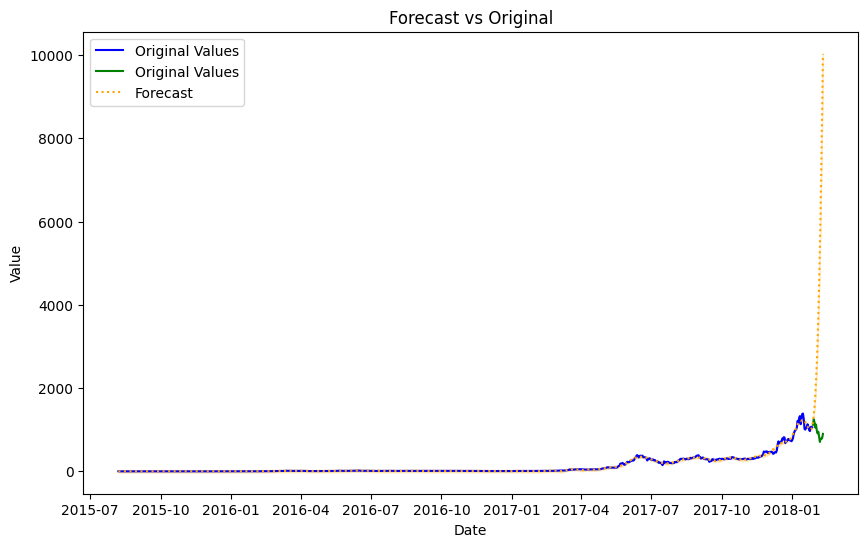

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/rws6ftog.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/0z0igkch.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/s

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 23.23593076728529
Test RMSE: 4393.157819475911
Percentage RMSE error: 459.1412382487503
Currency : bitcoin-atom
Shapes : ((25, 1), (10, 2), (15, 2))


19:37:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/qzohmtcj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/_s_tn3_c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75684', 'data', 'file=/tmp/tmpo6c7e_5u/qzohmtcj.json', 'init=/tmp/tmpo6c7e_5u/_s_tn3_c.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelzec043vb/prophet_model-20240529193759.csv', 'method=optimiz

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 107.0296966718196


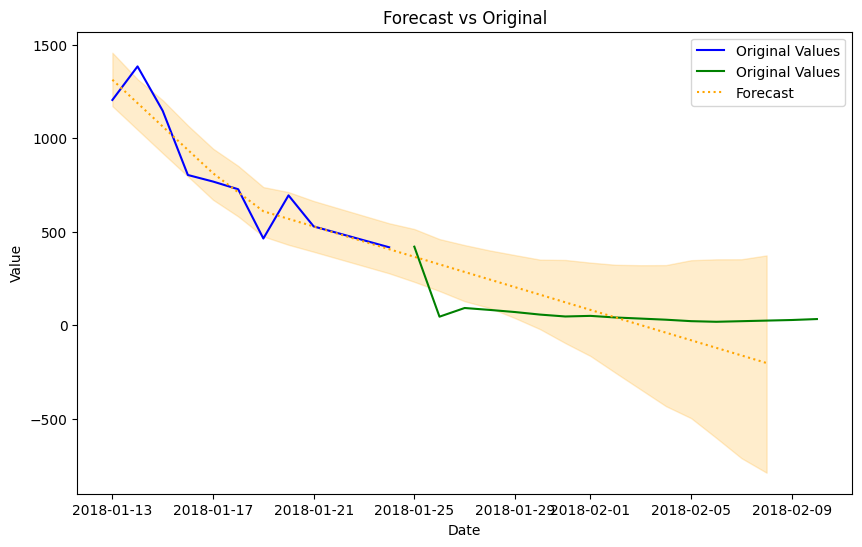

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/85ybmc54.json


Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 107.0296966718196
Test RMSE: 143.0877783369206
Percentage RMSE error: 200.84013603590424
Currency : dash
Shapes : ((1443, 1), (1428, 2), (15, 2))


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/dzsn0z7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60174', 'data', 'file=/tmp/tmpo6c7e_5u/85ybmc54.json', 'init=/tmp/tmpo6c7e_5u/dzsn0z7e.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_model1o9vo1ec/prophet_model-20240529193823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:38:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:38:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
19:38:23 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/y_cwtabs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/fqorvrur.json
DE

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 25.62065512119765


DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/bpoylvgp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37960', 'data', 'file=/tmp/tmpo6c7e_5u/kbjcimwh.json', 'init=/tmp/tmpo6c7e_5u/bpoylvgp.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelikn6zvdt/prophet_model-20240529194145.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:41:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:41:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


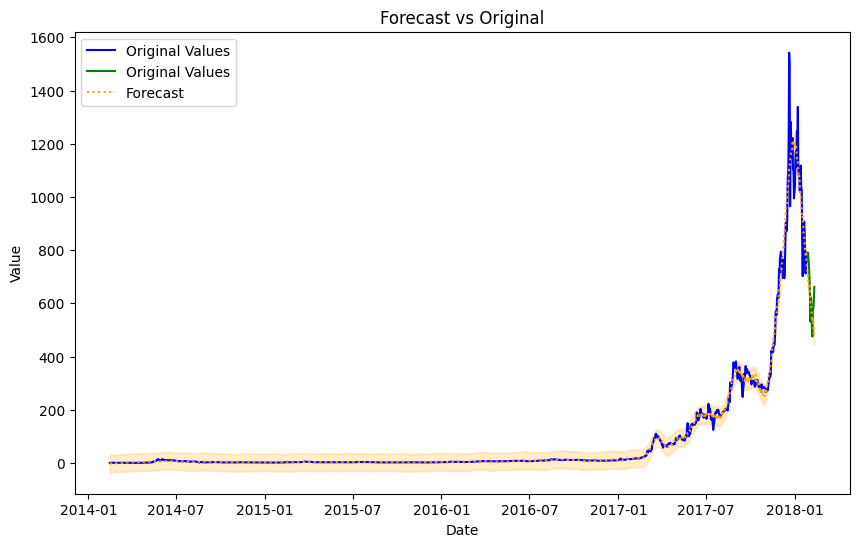

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/rn01g_p9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/9cg094e2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/s

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 25.62065512119765
Test RMSE: 77.82902328990245
Percentage RMSE error: 12.222056860979379
Currency : weth
Shapes : ((28, 1), (13, 2), (15, 2))


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/iv8g545p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/j35wm8a9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78983', 'data', 'file=/tmp/tmpo6c7e_5u/iv8g545p.json', 'init=/tmp/tmpo6c7e_5u/j35wm8a9.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modeljdb69p9m/prophet_model-20240529194147.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:41:47 - cmdstanpy - INFO - Chain [1] start processing
IN

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 83.4588287192786


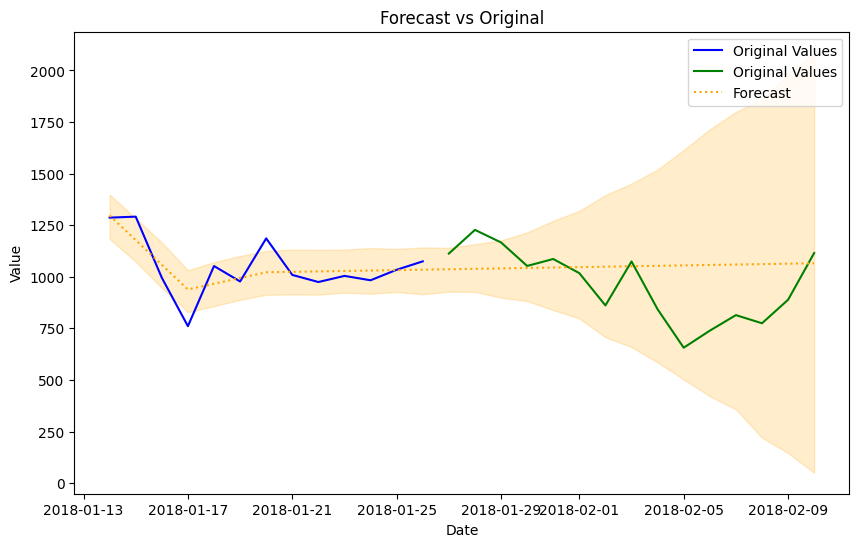

<ipython-input-46-ebbe1daae38d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/71v7o37e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/r53vi_oh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84116', 'data', 'file=/tmp/tmpo6c7e_5u/71v7o37e.json', 'init=/tmp/tmpo6c7e_5u/r53vi_oh.json', 'output', 'file=/tmp/tmpo6c7e_5u/pro

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 83.4588287192786
Test RMSE: 195.95832288106348
Percentage RMSE error: 20.372970098081723
Currency : byteball
Shapes : ((409, 1), (394, 2), (15, 2))


19:42:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/qvbywttl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo6c7e_5u/xcp0wfuu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13606', 'data', 'file=/tmp/tmpo6c7e_5u/qvbywttl.json', 'init=/tmp/tmpo6c7e_5u/xcp0wfuu.json', 'output', 'file=/tmp/tmpo6c7e_5u/prophet_modelm8s6pj85/prophet_model-20240529194210.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:42:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:42:10 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 70.9234508809078


19:43:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


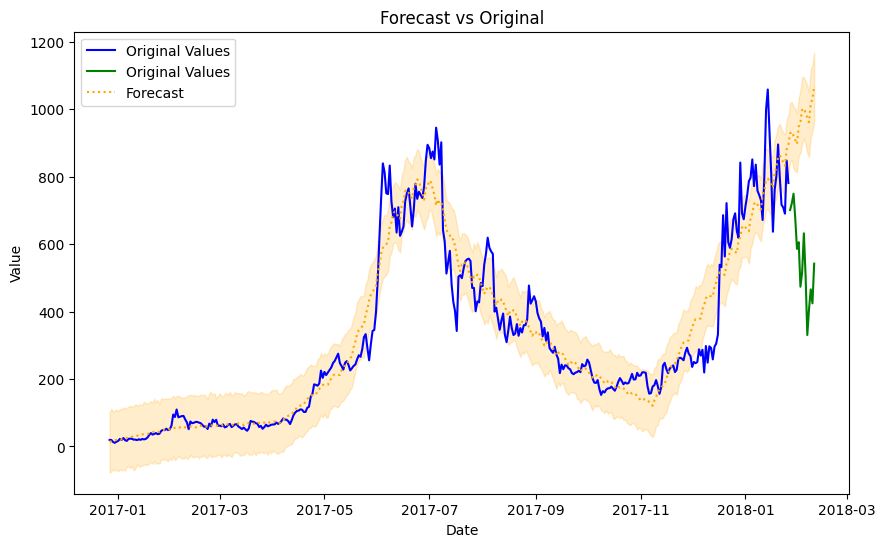

Best parameters: {'changepoint_prior_scale': 0.5, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 70.9234508809078
Test RMSE: 440.074145177234
Percentage RMSE error: 79.18443431124639


In [ ]:
# Prophet
rmse_scores = {}
forecasts = []
# plt.figure(figsize=(16, 6))
for i in high_list:
  print(f"Currency : {i}")
  df4 = df3[df3['Currency']==i]
  df4.set_index('Date', inplace = True)
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
  df_train = df4.iloc[:-15,:]
  df_test = df4.iloc[-15:,:]
  df_train = pd.DataFrame(df_train.groupby(df_train.index)['Price'].mean())
  df_test = pd.DataFrame(df_test.groupby(df_test.index)['Price'].mean())
  df_train = df_train.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
  df_test = df_test.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
  print(f"Shapes : {df4.shape, df_train.shape, df_test.shape}")
  # Define SARIMA parameters to search# Define your parameter grid
  param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.1, 1.0, 10.0],
    'changepoint_prior_scale': [0.0001, 0.001, 0.01, 0.1, 0.5]}
  results = []
  for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(df_train)
    future = model.make_future_dataframe(periods=len(df_test))
    forecast = model.predict(future)
      # Evaluate the model (e.g., using mean absolute error on the training set)
    y_true = df_train['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
      # Store the results
    results.append((params, rmse))

  best_params, best_rmse = min(results, key=lambda x: x[1])

  print(f'Best parameters: {best_params}')
  print(f'Best RMSE: {best_rmse}')
# Fit the final model with the best parameters
  best_model = Prophet(**best_params)
  best_model.fit(df_train)
  future = best_model.make_future_dataframe(periods=len(df_test))
  forecast = best_model.predict(future)
  forecast_train = forecast.iloc[:len(df_train),:]
  forecast_test = forecast.iloc[len(df_train):,:]
# Plot the forecast
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(df_train['ds'], df_train['y'], 'b-', label='Original Values')
  ax.plot(df_test['ds'], df_test['y'], 'green', label='Original Values')
  ax.plot(forecast['ds'], forecast['yhat'], 'orange', linestyle='dotted', label='Forecast')
  ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
  ax.legend()

  plt.title('Forecast vs Original')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.show()

  y_pred = forecast_test['yhat']
  y_true = df_test['y']

  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  print(f'Best parameters: {best_params}')
  print(f'Best RMSE: {best_rmse}')
  print(f'Test RMSE: {rmse}')
  print(f"Percentage RMSE error: {(rmse/df_test['y'].mean())*100}")
  rmse_scores[i] = (rmse/df_test['y'].mean())*100

#### Best Model and Predictions

The Prophet proved itself to be best at forecasting the prices for most cryptocurrencies. Hence using the model to forecast the top 10 cryptocurrencies by prices in the data in the year 2018

In [34]:
top_currencies = np.array(list(df3[df3['Year']==2018].groupby('Currency')['Price'].mean().sort_values(ascending=False).head(10).index))
top_currencies

array(['bit20', 'project-x', '42-coin', 'bitbtc', 'russian-mining-coin',
       'bitcoin', 'idex-membership', 'cryptopiafeeshares', 'primalbase',
       'bitcoin-cash'], dtype='<U19')

In [46]:
# df3[df3['Currency'].isin(top_currencies)]
date_limit = pd.to_datetime('2018-02-10')
dfk = df3[df3['Date'] == date_limit.date()]
dfk[dfk['Currency'].isin(top_currencies)]['Currency'].nunique()

10

<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/qdwn5yl7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/9le3flz6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83346', 'data', 'file=/tmp/tmpth3bteaw/qdwn5yl7.json', 'init=/tmp/tmpth3bteaw/9le3flz6.json', 'output', 'file=/tmp/tmpth3bteaw/pro

Currency : bit20
Shape of bit20 : (179, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/3boisly0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89005', 'data', 'file=/tmp/tmpth3bteaw/89jkpapw.json', 'init=/tmp/tmpth3bteaw/3boisly0.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelvq1ytje2/prophet_model-20240531174357.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:43:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/mpjmush4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tm

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 101103.05562502769


<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/4uqc3f9c.json
DEBUG:cmdstanpy:inp

Percentage RMSE error: 25.66580746913415
Currency : project-x
Shape of project-x : (242, 2)


17:45:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/5ob0j3ru.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/cznpt2ei.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66728', 'data', 'file=/tmp/tmpth3bteaw/5ob0j3ru.json', 'init=/tmp/tmpth3bteaw/cznpt2ei.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelv78rofji/prophet_model-20240531174501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:01 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 1.0}
Best RMSE: 218342.0575666497


17:45:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/hkmz46o6.json


Percentage RMSE error: 82.02651065171277
Currency : 42-coin
Shape of 42-coin : (1455, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/zz1gz177.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5241', 'data', 'file=/tmp/tmpth3bteaw/hkmz46o6.json', 'init=/tmp/tmpth3bteaw/zz1gz177.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelmcvkeet7/prophet_model-20240531174543.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:45:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/e9tmzvky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/bfbyaiu3.json
DEB

Best parameters: {'changepoint_prior_scale': 1, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 12541.027688614384


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50087', 'data', 'file=/tmp/tmpth3bteaw/0mge16ob.json', 'init=/tmp/tmpth3bteaw/8k14_ltw.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelpa08yzx3/prophet_model-20240531175431.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:54:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-4

Percentage RMSE error: 89.29895624566734
Currency : bitbtc
Shape of bitbtc : (1048, 2)


17:54:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:54:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/1b075vnp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/q80qdzb1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74344', 'data', 'file=/tmp/tmpth3bteaw/1b075vnp.json', 'init=/tmp/tmpth3bteaw/q80qdzb1.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelg9yaaiz_/prophet_model-20240531175435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:54:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:54:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 439.73107832972744


17:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to 

Percentage RMSE error: 19.96455345782591
Currency : russian-mining-coin
Shape of russian-mining-coin : (103, 2)


17:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/a2py5gok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/rx3o6mun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65540', 'data', 'file=/tmp/tmpth3bteaw/a2py5gok.json', 'init=/tmp/tmpth3bteaw/rx3o6mun.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_model7zgfdv5p/prophet_model-20240531175737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:57:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:57:37 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 1108.019754255206


17:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/o71sni25.json


Percentage RMSE error: 7.455432786401617
Currency : bitcoin
Shape of bitcoin : (1733, 2)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/1_1cqkut.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38469', 'data', 'file=/tmp/tmpth3bteaw/o71sni25.json', 'init=/tmp/tmpth3bteaw/1_1cqkut.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelzmabnk3l/prophet_model-20240531175821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:58:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:58:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
17:58:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/jaryx66k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/n0y748my.json
DE

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 293.17608894678216


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13425', 'data', 'file=/tmp/tmpth3bteaw/3yud1whv.json', 'init=/tmp/tmpth3bteaw/nbbj679a.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_model9wfp_7_7/prophet_model-20240531180402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:04:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:04:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['

Percentage RMSE error: 20.41054802736233
Currency : idex-membership
Shape of idex-membership : (23, 2)


18:04:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/8sxb6qyq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/eogrtylu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=686', 'data', 'file=/tmp/tmpth3bteaw/8sxb6qyq.json', 'init=/tmp/tmpth3bteaw/eogrtylu.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_model8sk3o3q5/prophet_model-20240531180406.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:04:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmd

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1}
Best RMSE: 0.03405159693730533


18:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to 

Percentage RMSE error: 0.0005089867080912241
Currency : cryptopiafeeshares
Shape of cryptopiafeeshares : (32, 2)


18:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/t3xpe0g0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/4unwlgqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53947', 'data', 'file=/tmp/tmpth3bteaw/t3xpe0g0.json', 'init=/tmp/tmpth3bteaw/4unwlgqz.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelz83hc0ay/prophet_model-20240531180808.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:08:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:c

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 22.44749907107416


<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/idfm8_ve.json
DEBUG:cmdstanpy:inp

Percentage RMSE error: 0.4134279782206539
Currency : primalbase
Shape of primalbase : (199, 2)


18:10:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/gunla0ve.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/omi1o7yy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48058', 'data', 'file=/tmp/tmpth3bteaw/gunla0ve.json', 'init=/tmp/tmpth3bteaw/omi1o7yy.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_modelx1seadbq/prophet_model-20240531181035.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:10:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:10:35 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10.0}
Best RMSE: 540.5305524118444


18:15:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])
<ipython-input-48-9c276777c85e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to 

Percentage RMSE error: 11.373999418593876
Currency : bitcoin-cash
Shape of bitcoin-cash : (203, 2)


18:15:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/7s30j2v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpth3bteaw/w2k10gzd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25158', 'data', 'file=/tmp/tmpth3bteaw/7s30j2v7.json', 'init=/tmp/tmpth3bteaw/w2k10gzd.json', 'output', 'file=/tmp/tmpth3bteaw/prophet_model8qaz1z5j/prophet_model-20240531181521.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:15:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:15:21 - cmdstanpy - INFO - Chain [1] 

Best parameters: {'changepoint_prior_scale': 10, 'holidays_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 0.1}
Best RMSE: 180.335256694011


18:16:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
<ipython-input-48-9c276777c85e>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast['ds'] = pd.to_datetime(forecast['ds'])


Percentage RMSE error: 16.529476966897107


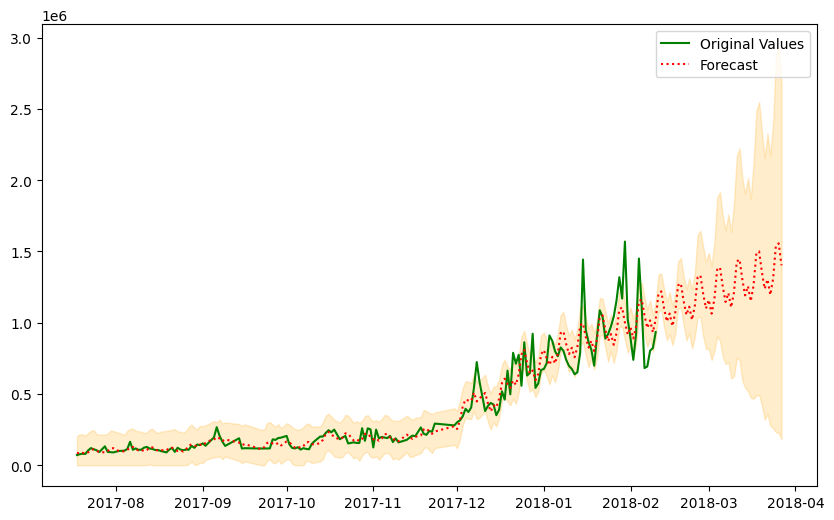

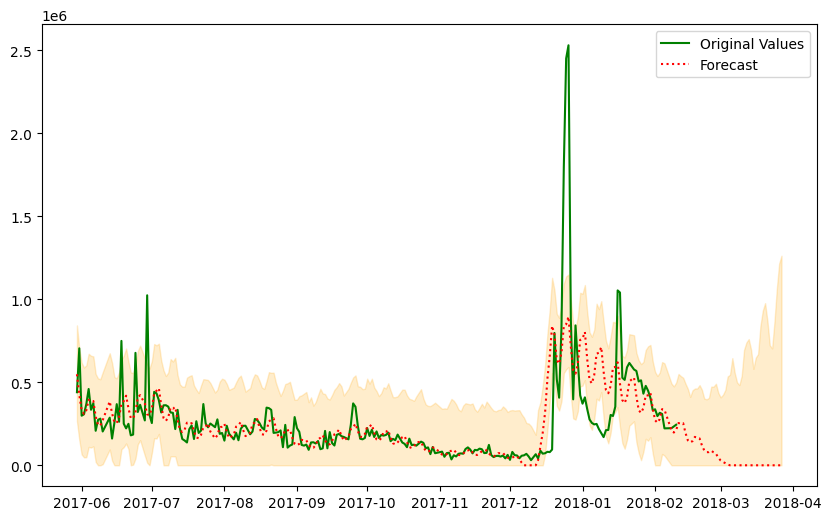

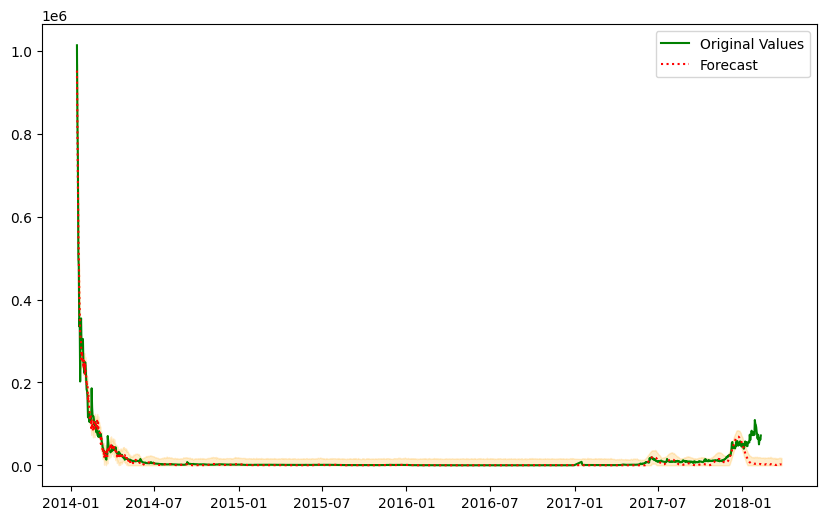

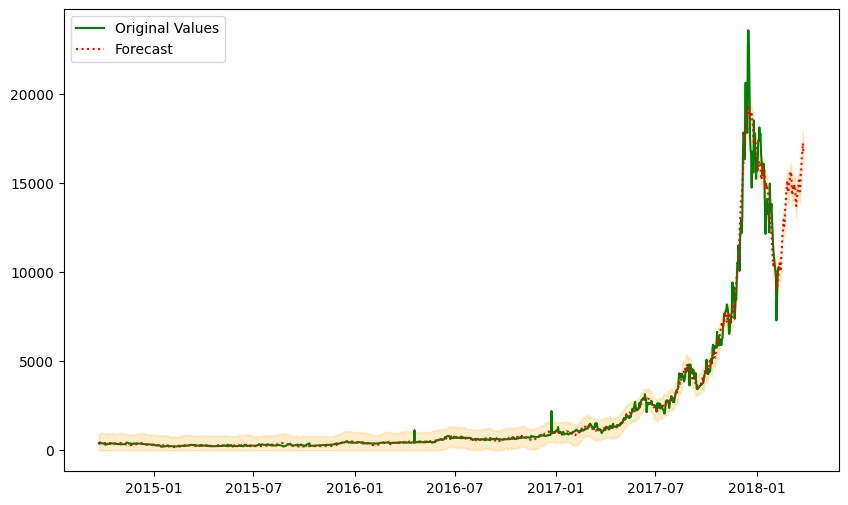

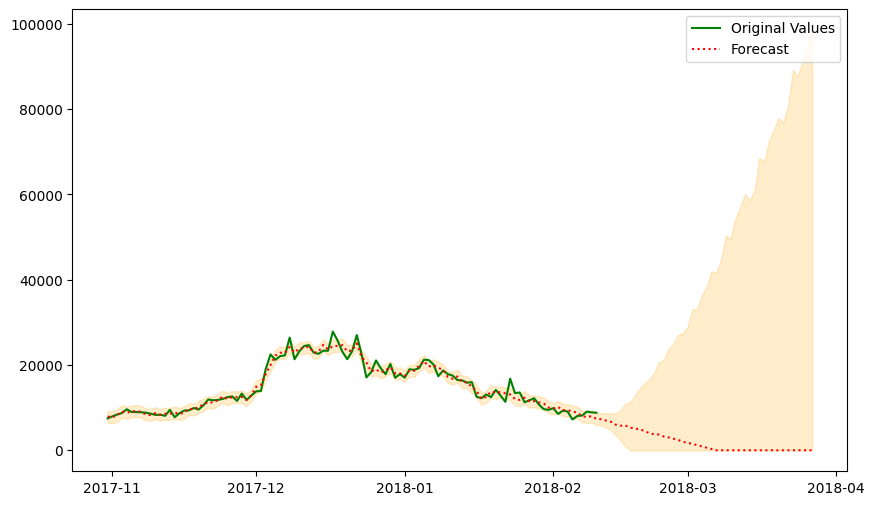

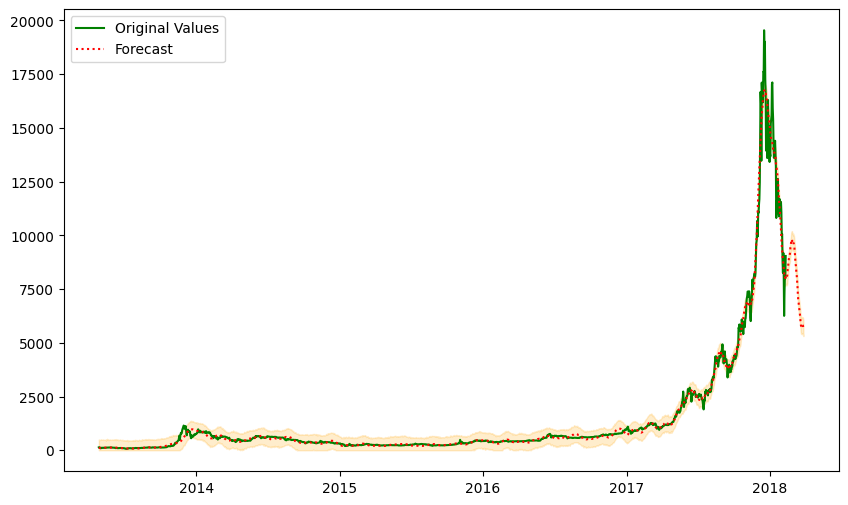

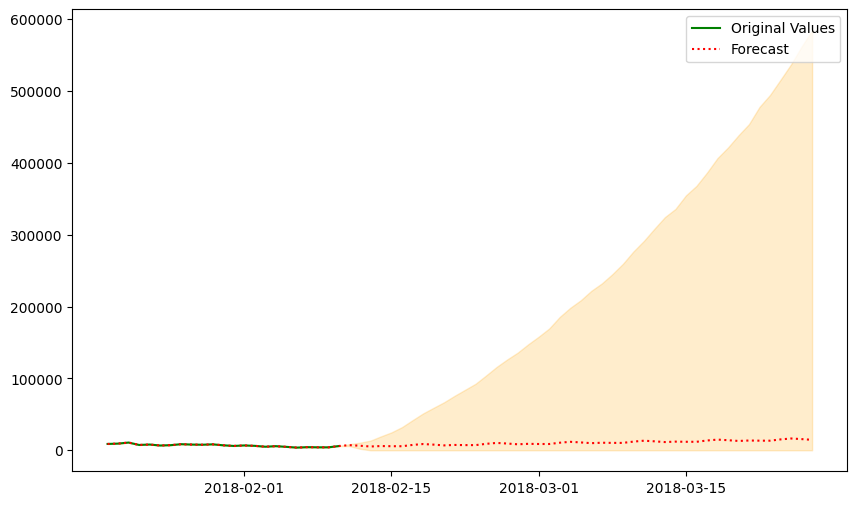

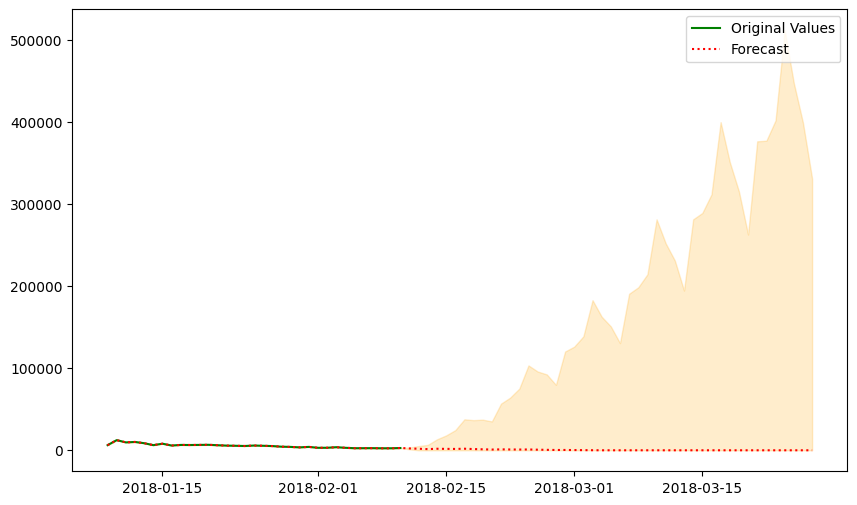

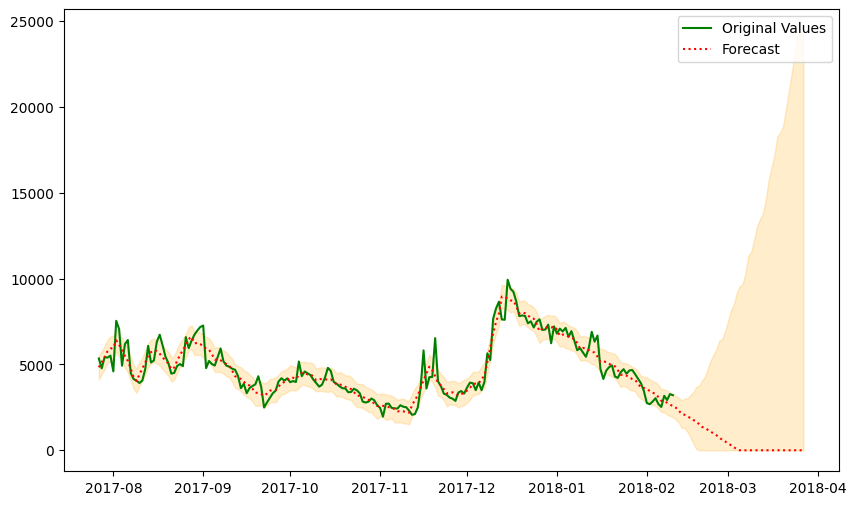

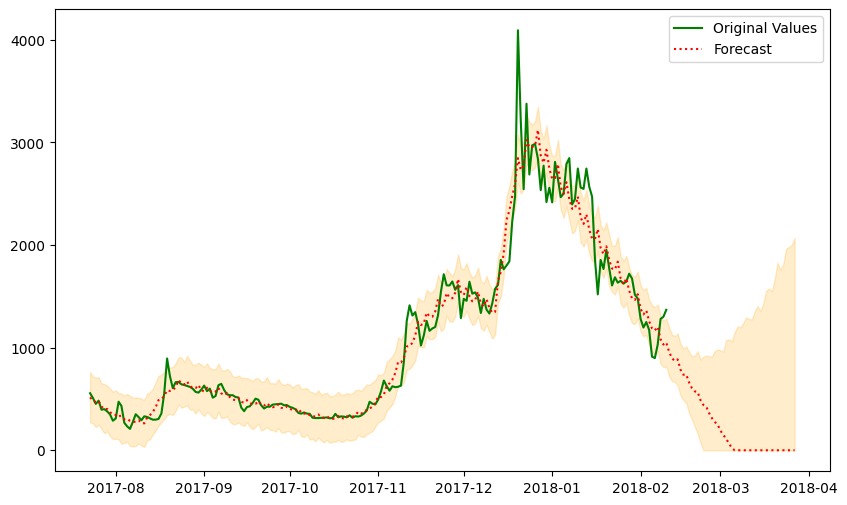

In [48]:
# Best Model
rmse_scores = {}
forecasts = {}
start_date = '2017-01-01'
end_date = '2018-02-01'
dates_range = pd.date_range(start=start_date, end=end_date)
preds_df = pd.DataFrame({'ds': dates_range})
# plt.figure(figsize=(16, 6))
for i in top_currencies:
  print(f"Currency : {i}")
  df4 = df3[df3['Currency']==i]
  df4.set_index('Date', inplace = True)
  df4.drop(columns = ['Currency', 'Year', 'Month', 'Day'], inplace = True)
  df4 = pd.DataFrame(df4.groupby(df4.index)['Price'].mean())
  df4 = df4.reset_index().rename(columns={'Date': 'ds', 'Price': 'y'})
  print(f"Shape of {i} : {df4.shape}")
  # Define SARIMA parameters to search# Define your parameter grid
  param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': [ 0.1, 1.0, 10.0],
    'holidays_prior_scale': [ 0.1, 1.0, 10.0],
    'changepoint_prior_scale': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10]}
  results = []
  for params in ParameterGrid(param_grid):
    model = Prophet(**params)
    model.fit(df4)
    future = model.make_future_dataframe(periods=45)
    forecast = model.predict(future)
    # Evaluate the model (e.g., using mean absolute error on the training set)
    y_true = df4['y'].values
    y_pred = forecast['yhat'][:len(y_true)].values
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    # Store the results
    results.append((params, rmse))
  best_params, best_rmse = min(results, key=lambda x: x[1])
  print(f'Best parameters: {best_params}')
  print(f'Best RMSE: {best_rmse}')
  # Fit the final model with the best parameters
  best_model = Prophet(**best_params)
  best_model.fit(df4)
  future = best_model.make_future_dataframe(periods=45)
  forecast = best_model.predict(future)
  forecast['yhat'] = np.where(forecast['yhat'] < 0, 0, forecast['yhat'])
  forecast['yhat_lower'] = np.where(forecast['yhat_lower'] < 0, 0, forecast['yhat_lower'])
  forecast['yhat_upper'] = np.where(forecast['yhat_upper'] < 0, 0, forecast['yhat_upper'])
  forecast.rename(columns={'yhat' : f"yhat{i}"},inplace=True)
  forecast_train = forecast.iloc[:-45,:]
  forecast_test = forecast.iloc[-45:,:]
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(df4['ds'], df4['y'], 'green', label='Original Values')
  ax.plot(forecast['ds'], forecast[f'yhat{i}'], 'red', linestyle='dotted', label='Forecast')
  ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
  ax.legend()
  forecasts[i] = forecast
  df4.rename(columns={'y' : f"y{i}"},inplace=True)
  forecast = forecast[[f"yhat{i}",'ds']]
  df4['ds'] = pd.to_datetime(df4['ds'])
  forecast['ds'] = pd.to_datetime(forecast['ds'])
  forecast = pd.merge(df4, forecast, on='ds', how='outer')
  preds_df = pd.merge(preds_df, forecast, on='ds', how='outer')
  # Plot the forecast
  # fig, ax = plt.subplots(figsize=(10, 6))
  # ax.plot(df4['ds'], df4['y'], 'green', label='Original Values')
  # ax.plot(forecast['ds'], forecast[f'yhat{i}'], 'red', linestyle='dotted', label='Forecast')
  # ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)
  # ax.legend()

  # plt.title('Forecast vs Original')
  # plt.xlabel('Date')
  # plt.ylabel('Value')
  # plt.show()

  # y_pred = forecast_test['yhat']
  # y_true = df_test['y']

  # rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  # print(f'Best parameters: {best_params}')
  # print(f'Best RMSE: {best_rmse}')
  # print(f'Test RMSE: {rmse}')
  print(f"Percentage RMSE error: {(best_rmse/df4[f'y{i}'].mean())*100}")
  # rmse_scores[i] = (rmse/df_test['y'].mean())*100

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=30990.647, Time=2.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31349.019, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31161.967, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31522.047, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31351.534, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31089.817, Time=2.11 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31233.174, Time=3.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31119.327, Time=2.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31327.857, Time=0.75 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31897.762, Time=2.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=30952.802, Time=1.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31526.354, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=31164.800, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=31093.064, Time=1.79 sec
 ARIMA(1,1,2)(0,0,0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


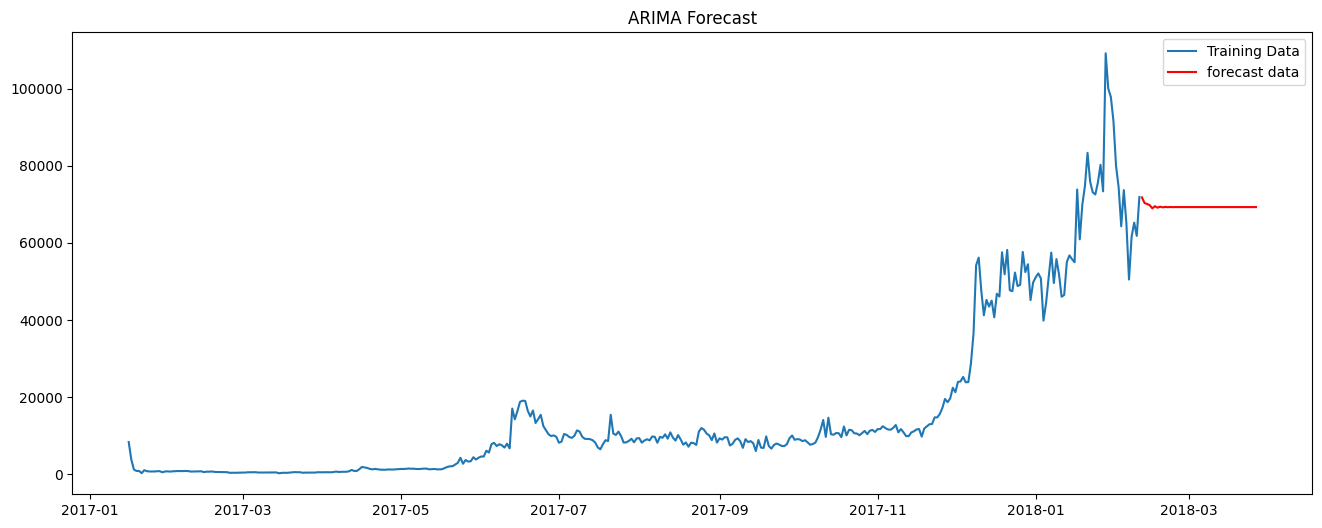

In [67]:
# Using Arima just for 42-coin due to high error in Prophet model
df4 = df3[df3['Currency']=='42-coin']
df4.set_index('Date',inplace = True)
auto_model = pm.auto_arima(df4['Price'],
                           start_p=1, start_q=1,
                           max_p=17, max_q=17,
                           d=1,  # Differencing order determined by ADF test
                           seasonal=False,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
arima_forecast = auto_model.predict(n_periods=45)
arima_forecast = pd.Series(arima_forecast)

# Plotting the results
df42 = df4[df4['Year']>=2017]
plt.figure(figsize=(16, 6))
plt.plot(df42.index, df42['Price'], label='Training Data')
forecast_index = pd.date_range(start=df42.index[-1], periods=45+1, freq='D')[1:]
plt.plot(forecast_index, arima_forecast, label='forecast data', color = 'red')

plt.title('ARIMA Forecast')
plt.legend()
plt.show()
# # Calculate evaluation metrics
# rmse = np.sqrt(mean_squared_error(actual_values, arima_forecast))
# mae = mean_absolute_error(actual_values, arima_forecast)
# r2 = r2_score(actual_values, arima_forecast)
# print(f"RMSE: {rmse}")
# print(f"MAE: {mae}")
# print(f"R² score: {r2}")
# print(f"Percentage RMSE error: {(rmse/df_test['Price'].mean())*100}")
# print(f"Percentage MAE error: {(mae/df_test['Price'].mean())*100}")
# print(f"R² score: {r2}")

In [68]:
# Create a DataFrame for the forecast
# forecast_df = pd.DataFrame(arima_forecast, index=forecast_index, columns=['Price'])
arima_forecast = pd.DataFrame(arima_forecast)
# Add forecast_index as a column
arima_forecast['Date'] = forecast_index
arima_forecast['Date'] = arima_forecast['Date'].dt.date
# Set the forecast_index as the index
arima_forecast.set_index('Date', inplace=True)
arima_forecast.rename(columns={0:'Price'},inplace = True)
arima_forecast['Currency'] = '42-coin'
arima_forecast

Price Currency
Date                             
2018-02-11  71811.293330  42-coin
2018-02-12  70354.723454  42-coin
2018-02-13  70101.366086  42-coin
2018-02-14  69790.756946  42-coin
2018-02-15  68963.434392  42-coin
2018-02-16  69529.686112  42-coin
2018-02-17  69142.121420  42-coin
2018-02-18  69407.385762  42-coin
2018-02-19  69225.828534  42-coin
2018-02-20  69350.093360  42-coin
2018-02-21  69265.041682  42-coin
2018-02-22  69323.254357  42-coin
2018-02-23  69283.411339  42-coin
2018-02-24  69310.681449  42-coin
2018-02-25  69292.016726  42-coin
2018-02-26  69304.791588  42-coin
2018-02-27  69296.047976  42-coin
2018-02-28  69302.032444  42-coin
2018-03-01  69297.936441  42-coin
2018-03-02  69300.739905  42-coin
2018-03-03  69298.821105  42-coin
2018-03-04  69300.134406  42-coin
2018-03-05  69299.235532  42-coin
2018-03-06  69299.850756  42-coin
2018-03-07  69299.429673  42-coin
2018-03-08  69299.717879  42-coin
2018-03-09  69299.520619  42-coin
2018-03-10  69299.655631  42-coin
2018-03-11  69299.563224  42-coin
2018-03-12  69299.626471  42-coin
2018-03-13  69299.583182  42-coin
2018-03-14  69299.612811  42-coin
2018-03-15  69299.592532  42-coin
2018-03-16  69299.606412  42-coin
2018-03-17  69299.596912  42-coin
2018-03-18  69299.603414  42-coin
2018-03-19  69299.598964  42-coin
2018-03-20  69299.602010  42-coin
2018-03-21  69299.599925  42-coin
2018-03-22  69299.601352  42-coin
2018-03-23  69299.600375  42-coin
2018-03-24  69299.601044  42-coin
2018-03-25  69299.600586  42-coin
2018-03-26  69299.600899  42-coin
2018-03-27  69299.600685  42-coin

In [71]:
# Concatenate df4 and the forecast DataFrame
combined_df = pd.concat([df4, arima_forecast])
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'Price':'y42-coin','Date':'ds'},inplace=True)
combined_df.drop(columns=['Year', 'Currency', 'Month', 'Day'], inplace = True)
combined_df

ds      y42-coin
0     2014-01-14  1.013620e+06
1     2014-01-15  8.280710e+05
2     2014-01-16  7.407350e+05
3     2014-01-17  5.034940e+05
4     2014-01-18  4.791090e+05
...          ...           ...
1495  2018-03-23  6.929960e+04
1496  2018-03-24  6.929960e+04
1497  2018-03-25  6.929960e+04
1498  2018-03-26  6.929960e+04
1499  2018-03-27  6.929960e+04

[1500 rows x 2 columns]

In [72]:
preds_df.drop(columns=['y42-coin', 'yhat42-coin'], inplace=True)
preds_df

ds  ybit20  yhatbit20  yproject-x  yhatproject-x  ybitbtc  \
0    2017-01-01     NaN        NaN         NaN            NaN  1099.08   
1    2017-01-02     NaN        NaN         NaN            NaN  1107.13   
2    2017-01-03     NaN        NaN         NaN            NaN      NaN   
3    2017-01-04     NaN        NaN         NaN            NaN  1075.77   
4    2017-01-05     NaN        NaN         NaN            NaN  1305.55   
...         ...     ...        ...         ...            ...      ...   
1784 2014-07-02     NaN        NaN         NaN            NaN      NaN   
1785 2014-07-05     NaN        NaN         NaN            NaN      NaN   
1786 2014-12-11     NaN        NaN         NaN            NaN      NaN   
1787 2015-04-25     NaN        NaN         NaN            NaN      NaN   
1788 2016-05-18     NaN        NaN         NaN            NaN      NaN   

       yhatbitbtc  yrussian-mining-coin  yhatrussian-mining-coin  ybitcoin  \
0     1006.489151                   NaN                      NaN   972.948   
1     1010.061427                   NaN                      NaN  1025.880   
2             NaN                   NaN                      NaN  1030.470   
3      959.962388                   NaN                      NaN  1100.520   
4      985.433009                   NaN                      NaN  1032.940   
...           ...                   ...                      ...       ...   
1784          NaN                   NaN                      NaN   645.444   
1785          NaN                   NaN                      NaN   631.675   
1786          NaN                   NaN                      NaN   356.597   
1787          NaN                   NaN                      NaN   229.881   
1788          NaN                   NaN                      NaN   454.584   

      yhatbitcoin  yidex-membership  yhatidex-membership  ycryptopiafeeshares  \
0      720.491118               NaN                  NaN                  NaN   
1      702.472259               NaN                  NaN                  NaN   
2      715.015859               NaN                  NaN                  NaN   
3      731.567617               NaN                  NaN                  NaN   
4      755.062705               NaN                  NaN                  NaN   
...           ...               ...                  ...                  ...   
1784   535.469703               NaN                  NaN                  NaN   
1785   538.854227               NaN                  NaN                  NaN   
1786   444.003197               NaN                  NaN                  NaN   
1787   204.755454               NaN                  NaN                  NaN   
1788   506.795979               NaN                  NaN                  NaN   

      yhatcryptopiafeeshares  yprimalbase  yhatprimalbase  ybitcoin-cash  \
0                        NaN          NaN             NaN            NaN   
1                        NaN          NaN             NaN            NaN   
2                        NaN          NaN             NaN            NaN   
3                        NaN          NaN             NaN            NaN   
4                        NaN          NaN             NaN            NaN   
...                      ...          ...             ...            ...   
1784                     NaN          NaN             NaN            NaN   
1785                     NaN          NaN             NaN            NaN   
1786                     NaN          NaN             NaN            NaN   
1787                     NaN          NaN             NaN            NaN   
1788                     NaN          NaN             NaN            NaN   

      yhatbitcoin-cash  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
1784               NaN  
1785               NaN  
1786               NaN  
1787               NaN  
1788               NaN  



In [74]:
# Ensure that the 'ds' column in both DataFrames is of datetime type
preds_df['ds'] = pd.to_datetime(preds_df['ds'])
combined_df['ds'] = pd.to_datetime(combined_df['ds'])

# Now perform the merge
preds_df = pd.merge(preds_df, combined_df, on='ds', how='outer')
preds_df

ds  ybit20  yhatbit20  yproject-x  yhatproject-x  ybitbtc  \
0    2017-01-01     NaN        NaN         NaN            NaN  1099.08   
1    2017-01-02     NaN        NaN         NaN            NaN  1107.13   
2    2017-01-03     NaN        NaN         NaN            NaN      NaN   
3    2017-01-04     NaN        NaN         NaN            NaN  1075.77   
4    2017-01-05     NaN        NaN         NaN            NaN  1305.55   
...         ...     ...        ...         ...            ...      ...   
1784 2014-07-02     NaN        NaN         NaN            NaN      NaN   
1785 2014-07-05     NaN        NaN         NaN            NaN      NaN   
1786 2014-12-11     NaN        NaN         NaN            NaN      NaN   
1787 2015-04-25     NaN        NaN         NaN            NaN      NaN   
1788 2016-05-18     NaN        NaN         NaN            NaN      NaN   

       yhatbitbtc  yrussian-mining-coin  yhatrussian-mining-coin  ybitcoin  \
0     1006.489151                   NaN                      NaN   972.948   
1     1010.061427                   NaN                      NaN  1025.880   
2             NaN                   NaN                      NaN  1030.470   
3      959.962388                   NaN                      NaN  1100.520   
4      985.433009                   NaN                      NaN  1032.940   
...           ...                   ...                      ...       ...   
1784          NaN                   NaN                      NaN   645.444   
1785          NaN                   NaN                      NaN   631.675   
1786          NaN                   NaN                      NaN   356.597   
1787          NaN                   NaN                      NaN   229.881   
1788          NaN                   NaN                      NaN   454.584   

      yhatbitcoin  yidex-membership  yhatidex-membership  ycryptopiafeeshares  \
0      720.491118               NaN                  NaN                  NaN   
1      702.472259               NaN                  NaN                  NaN   
2      715.015859               NaN                  NaN                  NaN   
3      731.567617               NaN                  NaN                  NaN   
4      755.062705               NaN                  NaN                  NaN   
...           ...               ...                  ...                  ...   
1784   535.469703               NaN                  NaN                  NaN   
1785   538.854227               NaN                  NaN                  NaN   
1786   444.003197               NaN                  NaN                  NaN   
1787   204.755454               NaN                  NaN                  NaN   
1788   506.795979               NaN                  NaN                  NaN   

      yhatcryptopiafeeshares  yprimalbase  yhatprimalbase  ybitcoin-cash  \
0                        NaN          NaN             NaN            NaN   
1                        NaN          NaN             NaN            NaN   
2                        NaN          NaN             NaN            NaN   
3                        NaN          NaN             NaN            NaN   
4                        NaN          NaN             NaN            NaN   
...                      ...          ...             ...            ...   
1784                     NaN          NaN             NaN            NaN   
1785                     NaN          NaN             NaN            NaN   
1786                     NaN          NaN             NaN            NaN   
1787                     NaN          NaN             NaN            NaN   
1788                     NaN          NaN             NaN            NaN   

      yhatbitcoin-cash  y42-coin  
0                  NaN       NaN  
1                  NaN       NaN  
2                  NaN       NaN  
3                  NaN       NaN  
4                  NaN       NaN  
...                ...       ...  
1784               NaN       NaN  
1785               Na

In [66]:
preds_df['ds'].sort_values(ascending=True)

1521   2013-04-28
1522   2013-04-29
1523   2013-04-30
1524   2013-05-01
1525   2013-05-02
          ...    
446    2018-03-23
447    2018-03-24
448    2018-03-25
449    2018-03-26
450    2018-03-27
Name: ds, Length: 1789, dtype: datetime64[ns]

In [75]:
preds_df1 = preds_df.dropna(subset = preds_df.drop(columns=['ds']).columns, how='all')
preds_df1 = pd.melt(preds_df1, id_vars=['ds'], var_name='currency', value_name='value')
preds_df1

ds  currency  value
0     2017-01-01    ybit20    NaN
1     2017-01-02    ybit20    NaN
2     2017-01-03    ybit20    NaN
3     2017-01-04    ybit20    NaN
4     2017-01-05    ybit20    NaN
...          ...       ...    ...
33986 2014-07-02  y42-coin    NaN
33987 2014-07-05  y42-coin    NaN
33988 2014-12-11  y42-coin    NaN
33989 2015-04-25  y42-coin    NaN
33990 2016-05-18  y42-coin    NaN

[33991 rows x 3 columns]

In [76]:
# Filter out rows where 'ds' is less than or equal to '2018-02-10' and 'currency' starts with 'yhat'
preds_df2 = preds_df1[~((preds_df1['ds'] <= '2018-02-10') & (preds_df1['currency'].str.startswith('yhat')))]
preds_df2

ds  currency  value
0     2017-01-01    ybit20    NaN
1     2017-01-02    ybit20    NaN
2     2017-01-03    ybit20    NaN
3     2017-01-04    ybit20    NaN
4     2017-01-05    ybit20    NaN
...          ...       ...    ...
33986 2014-07-02  y42-coin    NaN
33987 2014-07-05  y42-coin    NaN
33988 2014-12-11  y42-coin    NaN
33989 2015-04-25  y42-coin    NaN
33990 2016-05-18  y42-coin    NaN

[18295 rows x 3 columns]

In [77]:
preds_df2 = preds_df2[preds_df2['ds'] > '2017-05-01']
preds_df2

ds  currency         value
121   2017-05-02    ybit20           NaN
122   2017-05-03    ybit20           NaN
123   2017-05-04    ybit20           NaN
124   2017-05-05    ybit20           NaN
125   2017-05-06    ybit20           NaN
...          ...       ...           ...
32648 2018-03-23  y42-coin  69299.600375
32649 2018-03-24  y42-coin  69299.601044
32650 2018-03-25  y42-coin  69299.600586
32651 2018-03-26  y42-coin  69299.600899
32652 2018-03-27  y42-coin  69299.600685

[3705 rows x 3 columns]

In [78]:
preds_df2['currency'] = preds_df2['currency'].str.replace('^yhat', 'y', regex=True)

<ipython-input-78-fae011a509e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df2['currency'] = preds_df2['currency'].str.replace('^yhat', 'y', regex=True)


#### Results

In [89]:
# Create a 'style' column based on the date condition
preds_df2['style'] = preds_df2['ds'].apply(lambda x: 'dotted' if x > pd.Timestamp('2018-02-10') else 'solid')
# Plotting
plt.figure(figsize=(16, 6))
# Split the data into two parts based on the date
before_split = preds_df2[preds_df2['ds'] <= '2018-02-10']
after_split = preds_df2[preds_df2['ds'] >= '2018-02-10']

# Create the Plotly Express figure
fig = px.line(before_split, x='ds', y='value', color='currency', line_dash_sequence=['solid'],
              labels={'ds': 'Date', 'value': 'Value'},
              title='Currency Value Over Time')

# Add the dotted lines for the dates after the split
for currency in preds_df2['currency'].unique():
    df_subset = after_split[after_split['currency'] == currency]
    fig.add_scatter(x=df_subset['ds'], y=df_subset['value'], mode='lines', name=f"{currency} (dotted)",
                    line=dict(dash='dot'))

# Update layout for better appearance
fig.update_layout(xaxis_title='Date', yaxis_title='Value', legend_title='Currency')
fig.show()

<ipython-input-89-a99a6645873e>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1600x600 with 0 Axes>

In [80]:
preds_df2['currency'].unique()

array(['ybit20', 'yproject-x', 'ybitbtc', 'yrussian-mining-coin',
       'ybitcoin', 'yidex-membership', 'ycryptopiafeeshares',
       'yprimalbase', 'ybitcoin-cash', 'y42-coin'], dtype=object)

As the above plot is quite ambiguous we split the data into different ranges of currency prices to visuialize them clearly.

In [81]:
preds_df3 = preds_df2[preds_df2['currency'].isin(['ybit20', 'yproject-x'])]
preds_df3

ds    currency  value   style
121  2017-05-02      ybit20    NaN   solid
122  2017-05-03      ybit20    NaN   solid
123  2017-05-04      ybit20    NaN   solid
124  2017-05-05      ybit20    NaN   solid
125  2017-05-06      ybit20    NaN   solid
...         ...         ...    ...     ...
5813 2018-03-23  yproject-x    0.0  dotted
5814 2018-03-24  yproject-x    0.0  dotted
5815 2018-03-25  yproject-x    0.0  dotted
5816 2018-03-26  yproject-x    0.0  dotted
5817 2018-03-27  yproject-x    0.0  dotted

[750 rows x 4 columns]

In [87]:
# Plotting
df_before = preds_df3[preds_df3['ds'] <= '2018-02-10']
df_after = preds_df3[preds_df3['ds'] >= '2018-02-10']

# Create the plotly figure
fig = px.line(df_before, x='ds', y='value', color='currency', line_dash_sequence=['solid'], title='Currency Value Over Time')
fig2 = px.line(df_after, x='ds', y='value', color='currency', line_dash_sequence=['dot'], title='Currency Value Over Time')

# Combine both figures
for trace in fig2.data:
    fig.add_trace(trace)

# Update the layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Currency'
)

# Show the figure
fig.show()

In [83]:
preds_df4 = preds_df2[preds_df2['currency'].isin(['y42-coin', 'ybitbtc',
       'yrussian-mining-coin', 'ybitcoin', 'yidex-membership',
       'ycryptopiafeeshares', 'yprimalbase', 'ybitcoin-cash'])]
preds_df4

ds  currency         value   style
7277  2017-05-02   ybitbtc   1539.470000   solid
7278  2017-05-03   ybitbtc   1604.020000   solid
7279  2017-05-04   ybitbtc   1725.530000   solid
7280  2017-05-05   ybitbtc   1821.140000   solid
7281  2017-05-06   ybitbtc   1788.250000   solid
...          ...       ...           ...     ...
32648 2018-03-23  y42-coin  69299.600375  dotted
32649 2018-03-24  y42-coin  69299.601044  dotted
32650 2018-03-25  y42-coin  69299.600586  dotted
32651 2018-03-26  y42-coin  69299.600899  dotted
32652 2018-03-27  y42-coin  69299.600685  dotted

[2955 rows x 4 columns]

In [85]:

# Ensure your DataFrame 'preds_df4' has the necessary data
# preds_df4['ds'] should be in datetime format
preds_df4['ds'] = pd.to_datetime(preds_df4['ds'])

# Create a new column to differentiate solid and dotted lines
preds_df4['line_type'] = preds_df4['ds'].apply(lambda x: 'solid' if x <= pd.Timestamp('2018-02-10') else 'dotted')

# Plotting with Plotly Express
fig = px.line(preds_df4, x='ds', y='value', color='currency', line_dash='line_type', title='Currency Value Over Time')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Value',
    legend_title='Currency',
    width=1000,
    height=500
)

fig.show()

<ipython-input-85-dd29aff51692>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df4['ds'] = pd.to_datetime(preds_df4['ds'])
<ipython-input-85-dd29aff51692>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds_df4['line_type'] = preds_df4['ds'].apply(lambda x: 'solid' if x <= pd.Timestamp('2018-02-10') else 'dotted')


In [105]:
final_prices = preds_df2[preds_df2['ds']=='2018-03-01']
final_prices.sort_values(by='value', ascending = False).head(10)

ds              currency         value   style
2213  2018-03-01                ybit20  1.160627e+06  dotted
32626 2018-03-01              y42-coin  6.929794e+04  dotted
5791  2018-03-01            yproject-x  2.894931e+04  dotted
9369  2018-03-01               ybitbtc  1.505967e+04  dotted
16525 2018-03-01              ybitcoin  9.715409e+03  dotted
20103 2018-03-01      yidex-membership  8.734470e+03  dotted
12947 2018-03-01  yrussian-mining-coin  1.729621e+03  dotted
27259 2018-03-01           yprimalbase  4.081775e+02  dotted
23681 2018-03-01   ycryptopiafeeshares  2.629030e+02  dotted
30837 2018-03-01         ybitcoin-cash  1.920194e+02  dotted

#### Conclusion:

Among all the models that we have used the pret-trained model Prophet looked most promising and hence we have chosen that model for our final predictions.

Based on our predictions and above data, we can deduce that by the end of March 1, 2018 the top cryptocurrencies with highest price would be bit20, 42-coin, project-x, bitbc and bitcoin, assuming there are no new cryptocurrencies by then.